In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from math import ceil,floor

# Notes

Segnare quali pazienti hanno un mismatch nell'etichetta del seno sx, dx **x**

Segnare per la SliceLocation quali sono i mismatch più espliciti **x**

Guardare i casi estremi dell'istogramma della dimensione delle lesioni

Guardare PYRADIOMICS

Guardare MedSAM

# Utility functions

## Open dicom folder

In [2]:
def read_dicomdir(dir_path: str) -> list:
    # opening the dicom files in the dir
    dicom_files = [
        os.path.join(dir_path, f) 
        for f in os.listdir(dir_path)
    ]
    
    # Sort the files based on slice location (for this patient is already done)
    dicom_files.sort(key=lambda x: pydicom.dcmread(x).InstanceNumber)
    
    # read the actual dicom files
    slices = [pydicom.dcmread(f) for f in dicom_files]
    
    return slices

## Reconstruct 3d shape

In [3]:
def get_3d_shape(dicom_slices: list) -> np.ndarray:
    pixel_arrays = [s.pixel_array for s in dicom_slices]

    # stack the slices to create a 3d array
    volume_3d = np.stack(pixel_arrays, axis=0)
    
    # flip the dicom on the vertical axis
    return volume_3d[:, ::-1, :]

## Read the 3d shape of a ROI

In [4]:
def read_3d_rois(roi, slices_per_roi: int) -> dict:
    number_of_rois = int(roi.pixel_array.shape[0] / slices_per_roi)
    
    rois = [
        roi.pixel_array[
            i*slices_per_roi : (i+1) * slices_per_roi,
            :,
            :
        ][::-1, ::-1, :] # for each roi flip it on the vertical axis
        for i in range(number_of_rois)
    ]
    
    z_indexes = [
        [
            i
            for i in range(roi.shape[0]) if roi[i, :, :].flatten().any()
        ]
        for roi in rois
    ]
    
    y_indexes = [
        [
            i
            for i in range(roi.shape[1]) if roi[:, i, :].flatten().any()
        ]
        for roi in rois
    ]
    
    x_indexes = [
        [
            i
            for i in range(roi.shape[2]) if roi[:, :, i].flatten().any()
        ]
        for roi in rois
    ]

    return [
        {
            "z_indexes": z_index,
            "y_indexes": y_index,
            "x_indexes": x_index,
            "roi": roi
        }
        for z_index, y_index, x_index, roi in zip(z_indexes, y_indexes, x_indexes, rois)
    ]

In [5]:
def get_roi_size(roi: dict) -> tuple:
    if pd.isnull(roi):
        return roi
    else:
        x_off = max(roi["x_indexes"]) - min(roi["x_indexes"])
        y_off = max(roi["y_indexes"]) - min(roi["y_indexes"])
        z_off = max(roi["z_indexes"]) - min(roi["z_indexes"])
        return (z_off+1, y_off+1, x_off+1)

# Patient 1

In [5]:
patient1_path = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-001/03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/600.000000-Registered Ax T2 FSE-08519"
roi_filepath = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-001/03-05-2004-NA-MRI BREASTS - Delayed contrast-93547/500.000000-ROI-38451/1-1.dcm"

## Opening multiple slices

In [6]:
slices = read_dicomdir(patient1_path)
volume_3d = get_3d_shape(slices)

In [7]:
volume_3d.shape # axis system is (z,y,x)

(116, 512, 512)

### Axial 

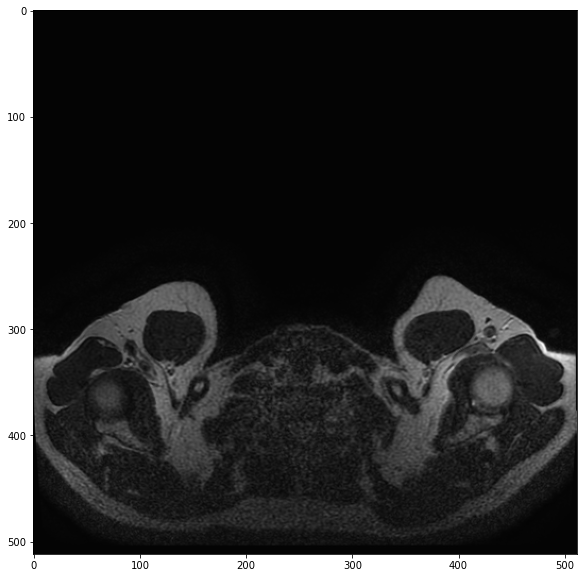

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(volume_3d[1, :, :], cmap=plt.cm.gray)

### Coronal

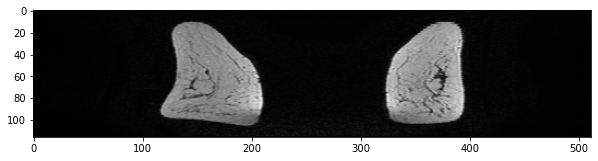

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(volume_3d[:, 234, :], cmap=plt.cm.gray)

### Sagittal

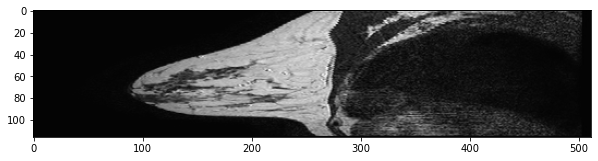

In [10]:
plt.figure(figsize = (10,10))
plt.imshow(volume_3d[:, :, 140], cmap=plt.cm.gray)

## Opening ROI

In [11]:
roi = pydicom.dcmread(roi_filepath)

## Overlapping ROI and MRI

In [12]:
rois = read_3d_rois(roi, 116)

### Left breast

In [13]:
rois[0]

{'z_indexes': [82, 83, 84, 85, 86, 87],
 'y_indexes': [172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213],
 'x_indexes': [142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164],
 'roi': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0

Text(0.5, 1.0, 'z = 83 Slice Location = -56.8533783')

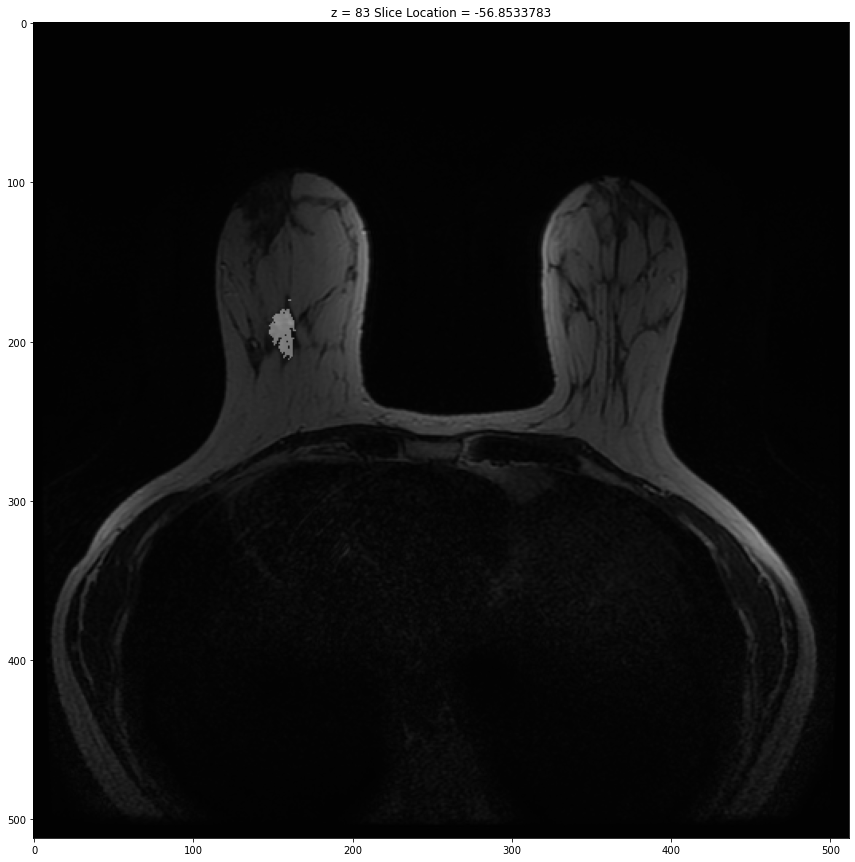

In [14]:
z = 83
plt.figure(figsize = (15,15))
plt.imshow(volume_3d[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

Text(0.5, 1.0, 'z = 87 Slice Location = -64.8533783')

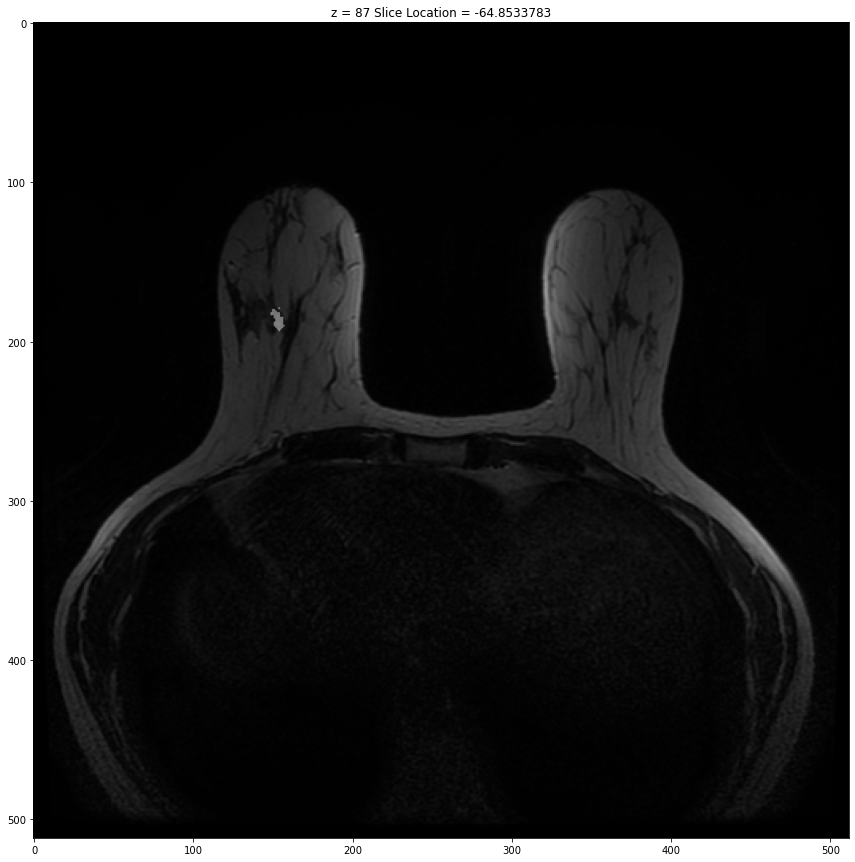

In [16]:
z = 87
plt.figure(figsize = (15,15))
plt.imshow(volume_3d[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

### Right breast

In [17]:
rois[1]

{'z_indexes': [82, 83, 84, 85],
 'y_indexes': [188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233],
 'x_indexes': [360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376],
 'roi': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 

Text(0.5, 1.0, 'z = 82 Slice Location = -54.8533783')

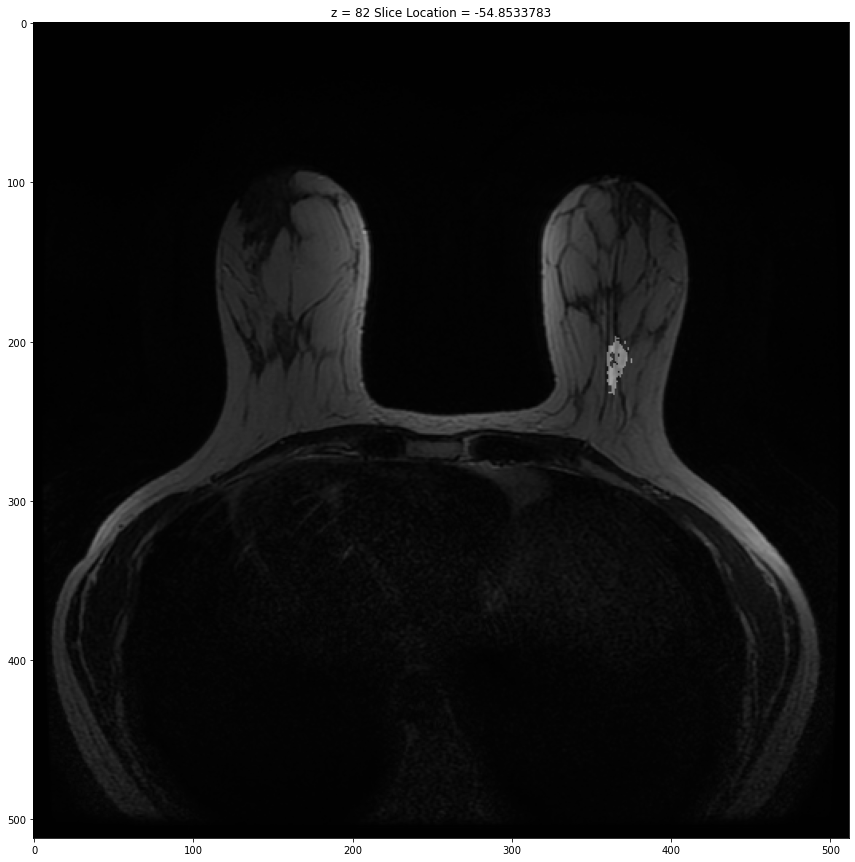

In [18]:
z = 82
plt.figure(figsize = (15,15))
plt.imshow(volume_3d[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

Text(0.5, 1.0, 'z = 85 Slice Location = -60.8533783')

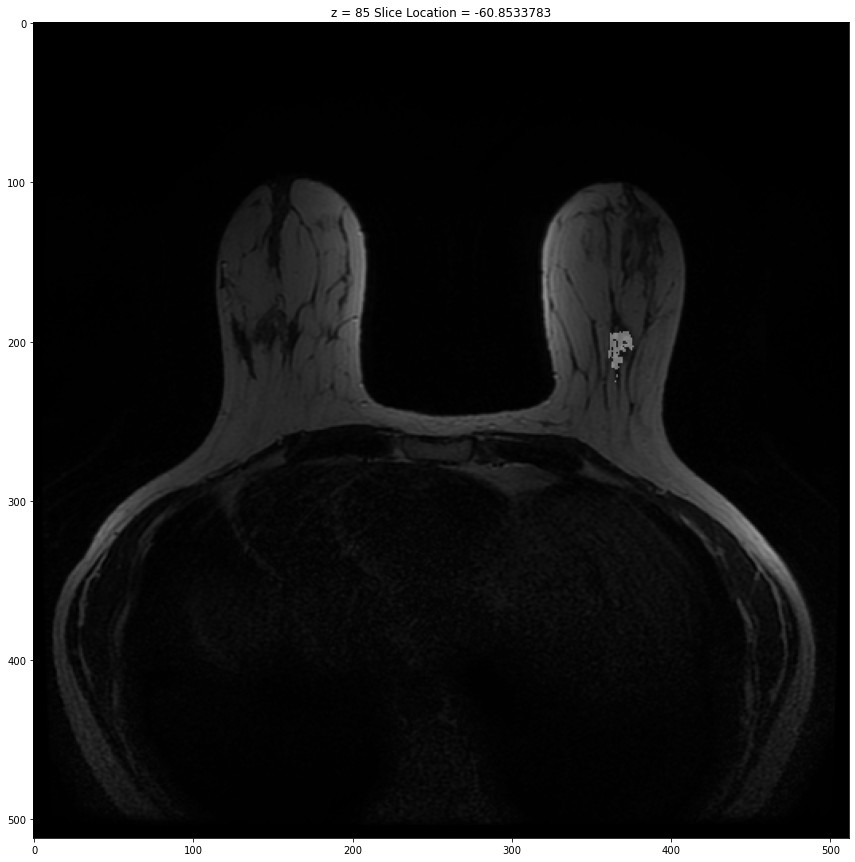

In [19]:
z = 85
plt.figure(figsize = (15,15))
plt.imshow(volume_3d[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

# Patient 3

In [24]:
patient3_path = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-003/03-05-2004-NA-MRI BREASTS - Delayed contrast-72782/600.000000-Registered Ax T2 FSE-92268"
roi3_filepath = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-003/03-05-2004-NA-MRI BREASTS - Delayed contrast-72782/500.000000-ROI-23921/1-1.dcm"

patient3_slices = read_dicomdir(patient3_path)
patient3_3dmodel = get_3d_shape(patient3_slices)

In [25]:
patient3_3dmodel.shape

(112, 512, 512)

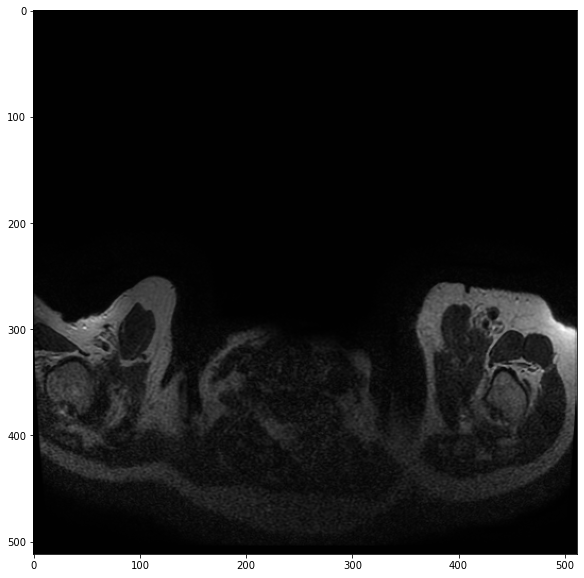

In [27]:
plt.figure(figsize = (10,10))
plt.imshow(patient3_3dmodel[1, :, :], cmap=plt.cm.gray)

In [28]:
roi3 = pydicom.dcmread(roi3_filepath)

In [29]:
rois = read_3d_rois(roi3, 112)

In [30]:
rois[0]

{'z_indexes': [49, 50, 51, 52, 53, 54, 55],
 'y_indexes': [178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217],
 'x_indexes': [357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  366,
  367,
  368,
  369,
  370,
  371,
  372,
  373,
  374,
  375,
  376,
  377],
 'roi': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0,

Text(0.5, 1.0, 'z = 49 Slice Location = 3.244155884')

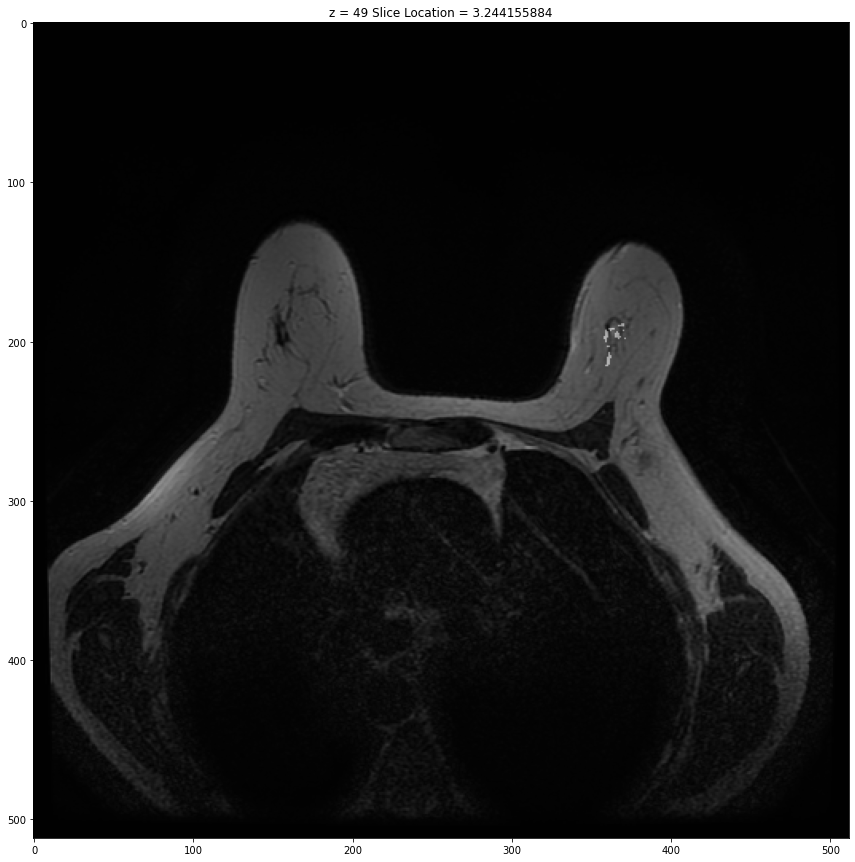

In [34]:
z = 49
plt.figure(figsize = (15,15))
plt.imshow(patient3_3dmodel[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {patient3_slices[z].SliceLocation}")

In [89]:
rois[0]

{'z_indexes': [82, 83, 84, 85, 86, 87],
 'y_indexes': [172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213],
 'x_indexes': [142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164],
 'roi': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0

# Inconsistencies in data

## AMBL-595 
Expected lesions: L22.86 and R-45.34

Both the lesions are on the left

In [23]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-595/04-12-2006-NA-MRI BREASTS - Delayed contrast-99337/600.000000-Registered Ax T2 FSE-16358")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-595/04-12-2006-NA-MRI BREASTS - Delayed contrast-99337/500.000000-ROI-96750/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [27]:
print(rois[0]["z_indexes"])
print(rois[1]["z_indexes"])

[51, 52, 53, 54]
[83, 84, 85]


Text(0.5, 1.0, 'z = 53 Slice Location = 22.86351395')

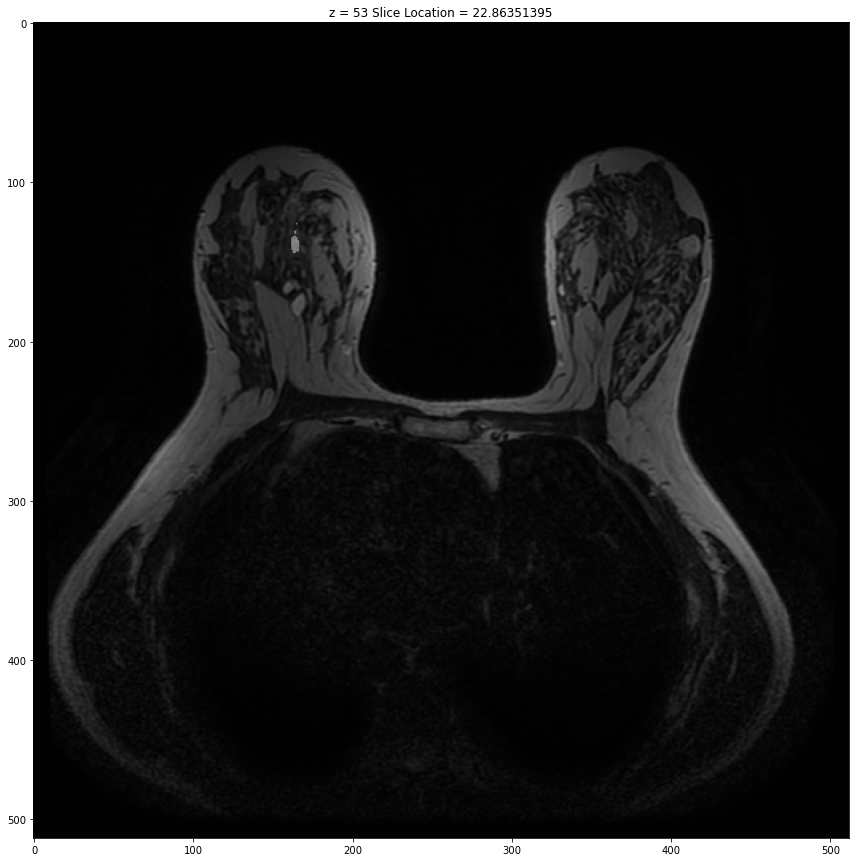

In [29]:
z = 53
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

Text(0.5, 1.0, 'z = 84 Slice Location = -45.33649445')

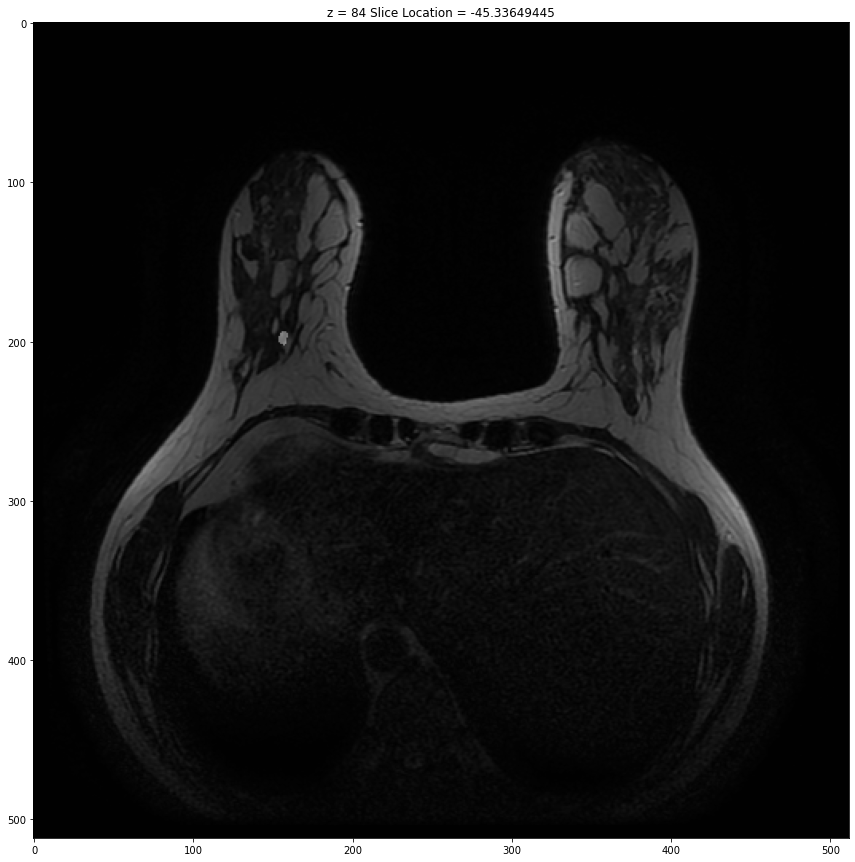

In [30]:
z = 84
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-629
Expected lesions: L39.93, R-2.07, R-20.07, R1.93, R-48.07 and R-32.07. There is one lesion in right breast between 7.92 and 3.92, which is not present in the excel. However, by excluding all the other lesions, R1.93 is the most plausible


In [80]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-629/01-30-2007-NA-MRI BREASTS - Delayed contrast-40670/600.000000-Registered Ax T2 FSE-05708")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-629/01-30-2007-NA-MRI BREASTS - Delayed contrast-40670/500.000000-ROI-75632/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [82]:
print(rois[0]["z_indexes"]) # L39.93
print(rois[1]["z_indexes"]) # R-2.07
print(rois[2]["z_indexes"]) # R-20.07
print(rois[3]["z_indexes"]) # R1.93
print(rois[4]["z_indexes"]) # R-48.07
print(rois[5]["z_indexes"]) # R-32.07

[37, 38, 39, 40, 41, 42]
[58, 59, 60, 61]
[67, 68, 69, 70, 71]
[55, 56, 57]
[81, 82]
[73, 74, 75]


Text(0.5, 1.0, 'z = 75 Slice Location = -32.07292938')

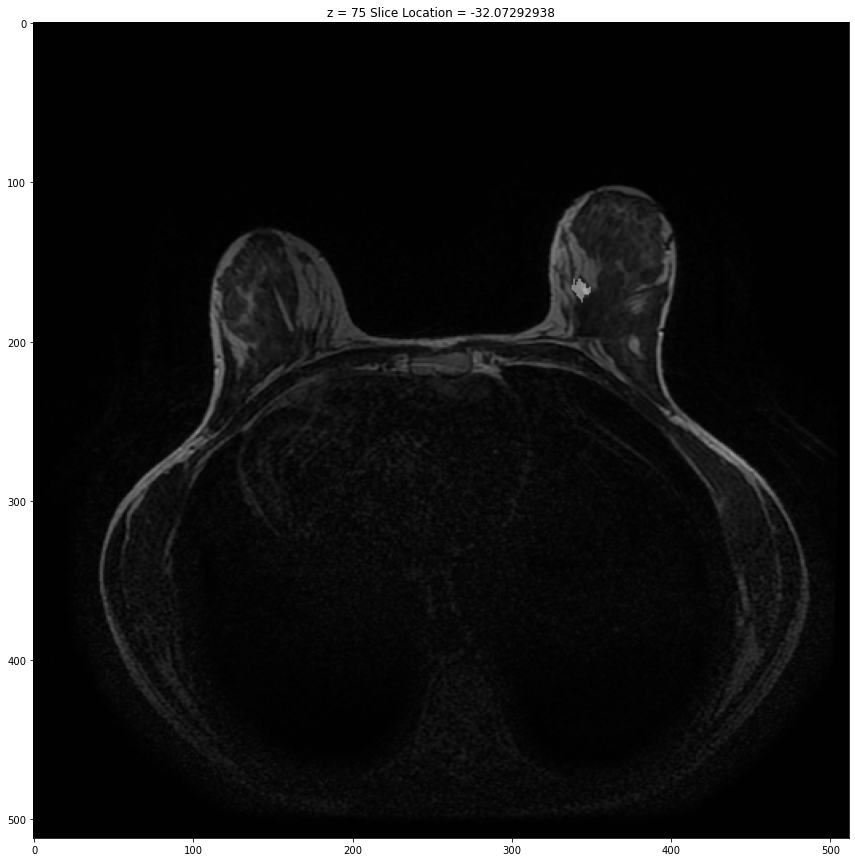

In [94]:
z = 75
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[5]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

Text(0.5, 1.0, 'z = 57 Slice Location = 3.927070618')

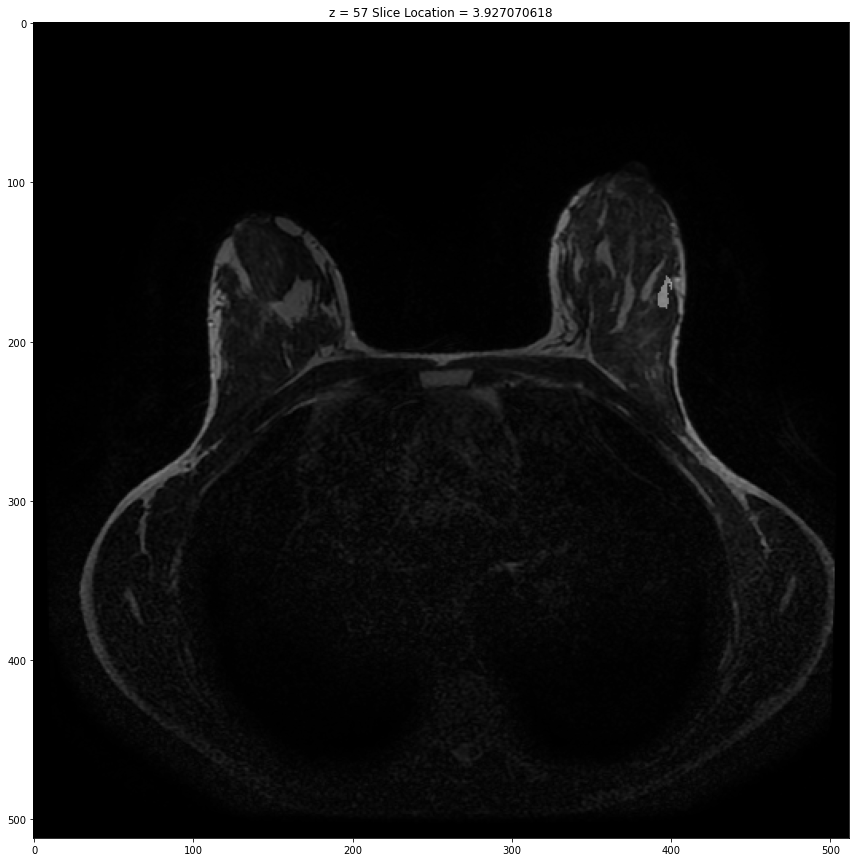

In [29]:
z = 57
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[3]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-572

Expected the following lesions: R-11.00, L-21, R-51, L-11, L-27

In [53]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-572/11-25-2005-NA-MRI BREASTS - Delayed contrast-51529/600.000000-Registered Ax T2 FSE-43029")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-572/11-25-2005-NA-MRI BREASTS - Delayed contrast-51529/500.000000-ROI-99161/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [55]:
print(rois[0]["z_indexes"]) # R-51
print(rois[1]["z_indexes"]) # L-11
print(rois[2]["z_indexes"]) # L-27
print(rois[3]["z_indexes"]) # R-11
print(rois[4]["z_indexes"]) # L-21

[77, 78, 79, 80, 81, 82, 83, 84, 85]
[59, 60, 61]
[67, 68, 69]
[60, 61, 62, 63]
[65, 66, 67]


Text(0.5, 1.0, 'z = 67 Slice Location = -22.99975586')

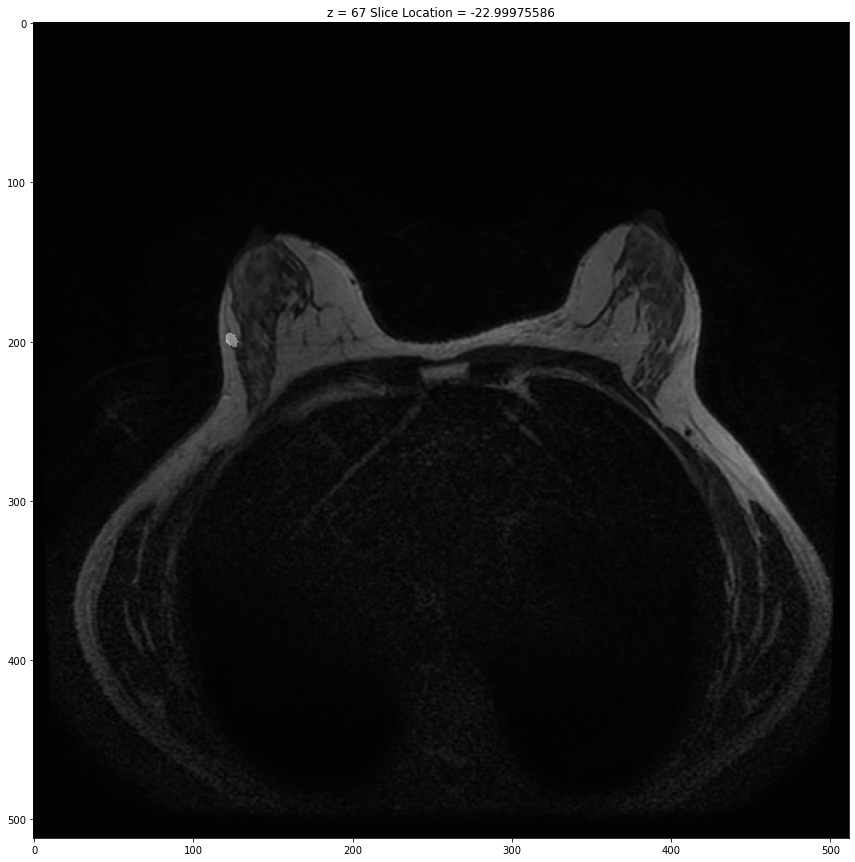

In [78]:
z = 67
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[4]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-579

Expected the following lesions: R-42.57, R-40.57. Both are tumor

In [6]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-579/12-21-2005-NA-MRI BREASTS - Delayed contrast-84296/600.000000-Registered Ax T2 FSE-17158")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-579/12-21-2005-NA-MRI BREASTS - Delayed contrast-84296/500.000000-ROI-89400/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [7]:
print(rois[0]["z_indexes"]) # 
print(rois[1]["z_indexes"]) # 

[71, 72, 73, 74, 75, 76, 77, 78]
[74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


Text(0.5, 1.0, 'z = 78 Slice Location = -46.57317352')

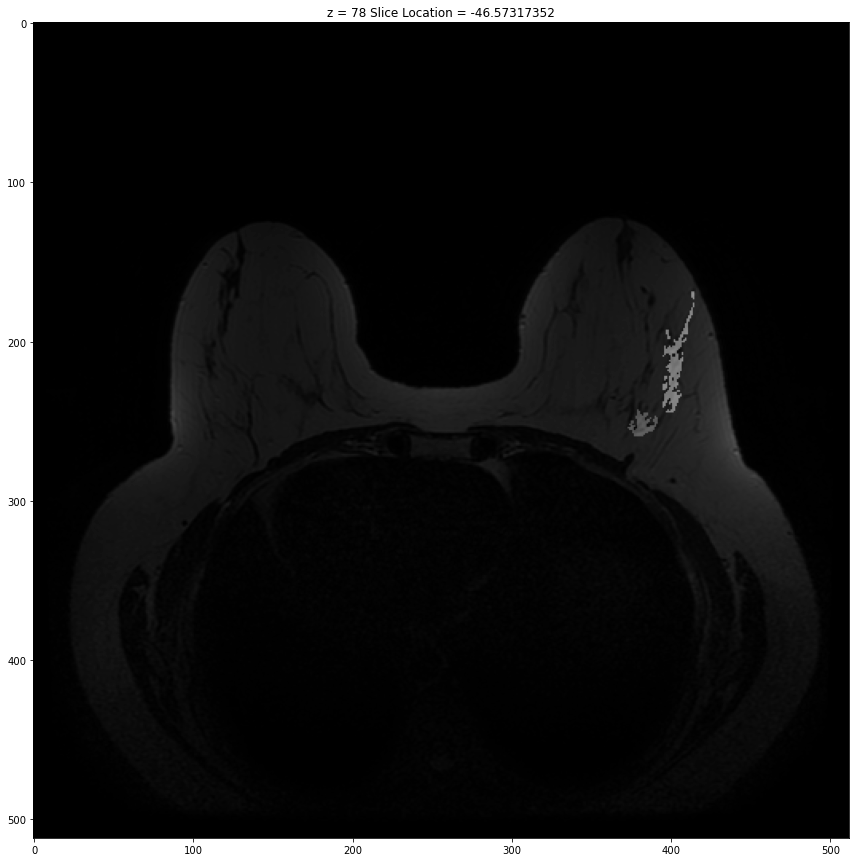

In [11]:
z = 78
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-590

L37.31, L-13.27, L8.71, R-22.09, R-24.29. Both lesions on the right are benign

In [12]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-590/02-08-2006-NA-MRI BREASTS - Delayed contrast-70942/600.000000-Registered Ax T2 FSE-54767")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-590/02-08-2006-NA-MRI BREASTS - Delayed contrast-70942/500.000000-ROI-91209/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [13]:
print(rois[0]["z_indexes"]) # R
print(rois[1]["z_indexes"]) # R
print(rois[2]["z_indexes"]) # L8.71
print(rois[3]["z_indexes"]) # L37.31
print(rois[4]["z_indexes"]) # L-13.27

[65, 66, 67, 68, 69, 70, 71, 72, 73]
[68, 69, 70]
[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[60, 61, 62, 63, 64, 65, 66, 67, 68]


Text(0.5, 1.0, 'z = 61 Slice Location = -4.492590904')

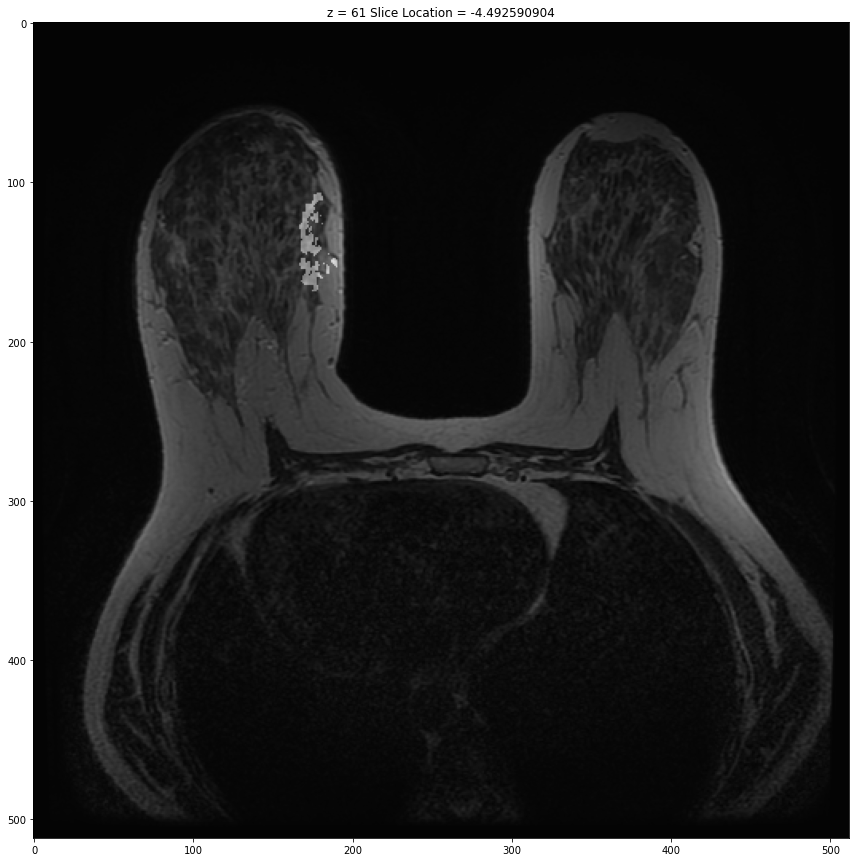

In [27]:
z = 61
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[2]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-626

Expected lesions: R4.40, R12.4

In [29]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-626/12-22-2006-NA-MRI BREASTS - Delayed contrast-30307/600.000000-Registered Ax T2 FSE-43489")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-626/12-22-2006-NA-MRI BREASTS - Delayed contrast-30307/500.000000-ROI-54119/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [30]:
print(rois[0]["z_indexes"]) # R4.40
print(rois[1]["z_indexes"]) # R12.4

[48, 49, 50, 51, 52, 53, 54, 55, 56]
[48, 49, 50]


Text(0.5, 1.0, 'z = 50 Slice Location = 10.4024353')

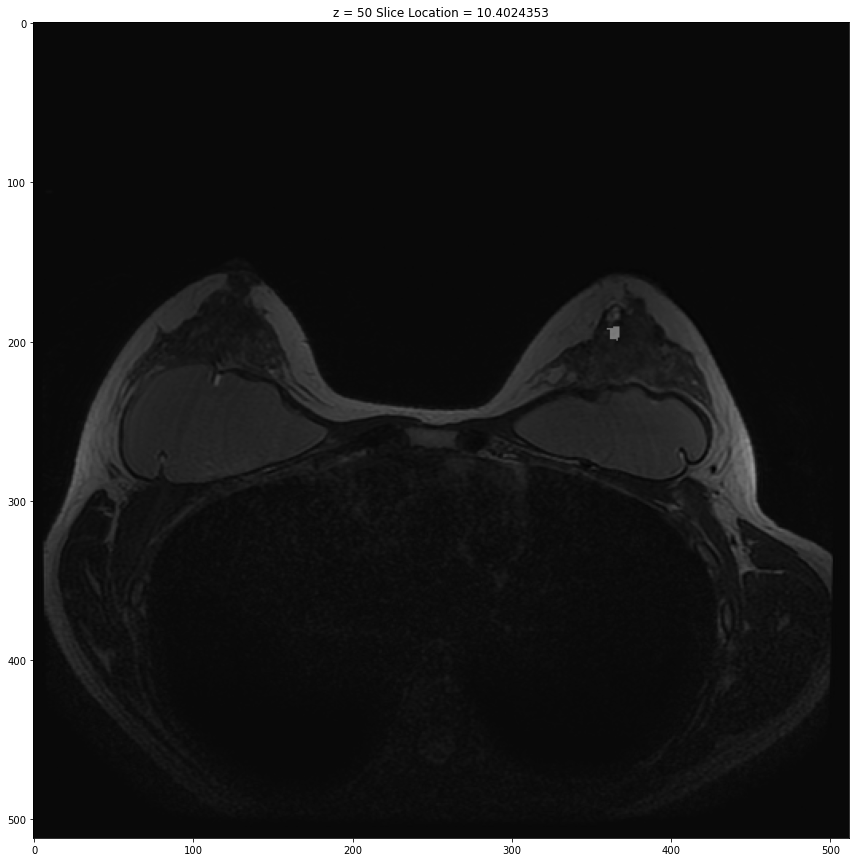

In [32]:
z = 50
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-631
Expected lesions: L33.93, L25.93. Both are tumor

In [34]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-631/02-21-2007-NA-MRI BREASTS - Delayed contrast-91039/600.000000-Registered Ax T2 FSE-75697")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-631/02-21-2007-NA-MRI BREASTS - Delayed contrast-91039/500.000000-ROI-68853/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [35]:
print(rois[0]["z_indexes"]) # L33.93
print(rois[1]["z_indexes"]) # L25.93

[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56, 57, 58]
[43, 44, 45, 46, 47, 48]


Text(0.5, 1.0, 'z = 48 Slice Location = 21.92709351')

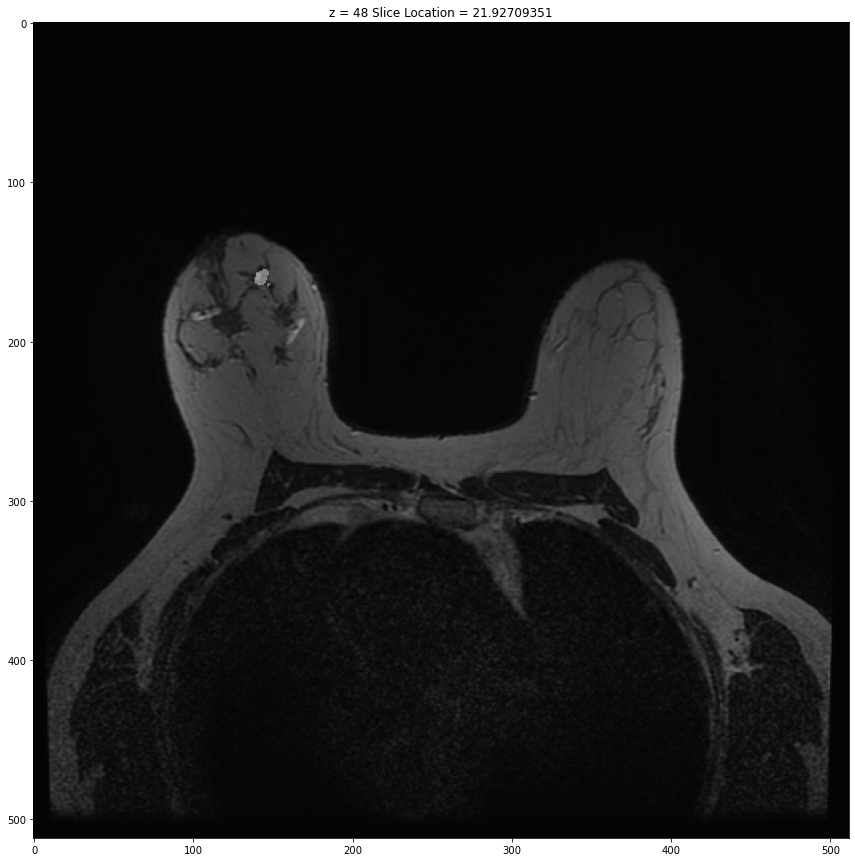

In [40]:
z = 48
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.4)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

## AMBL-574

Expected the following lesions: L16.76, R-27.24, R-27.4, R-31.24. We can already expect some problems on the right due to the closeness of many lesions

In [42]:
slices = read_dicomdir("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-574/12-01-2005-NA-MRI BREASTS - Delayed contrast-93585/600.000000-Registered Ax T2 FSE-56269")
patient_3d_model = get_3d_shape(slices)
slices_per_file = patient_3d_model.shape[0]

roi = pydicom.dcmread("/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions/AMBL-574/12-01-2005-NA-MRI BREASTS - Delayed contrast-93585/500.000000-ROI-73859/1-1.dcm")
rois = read_3d_rois(roi, slices_per_file)

In [44]:
print(rois[0]["z_indexes"]) # 
print(rois[1]["z_indexes"]) # 
print(rois[2]["z_indexes"]) # 
print(rois[3]["z_indexes"]) # L16.76

[71, 72, 73]
[71, 72, 73]
[73, 74, 75, 76]
[46, 47, 48, 49, 50, 51]


Text(0.5, 1.0, 'z = 73 Slice Location = -29.24365997')

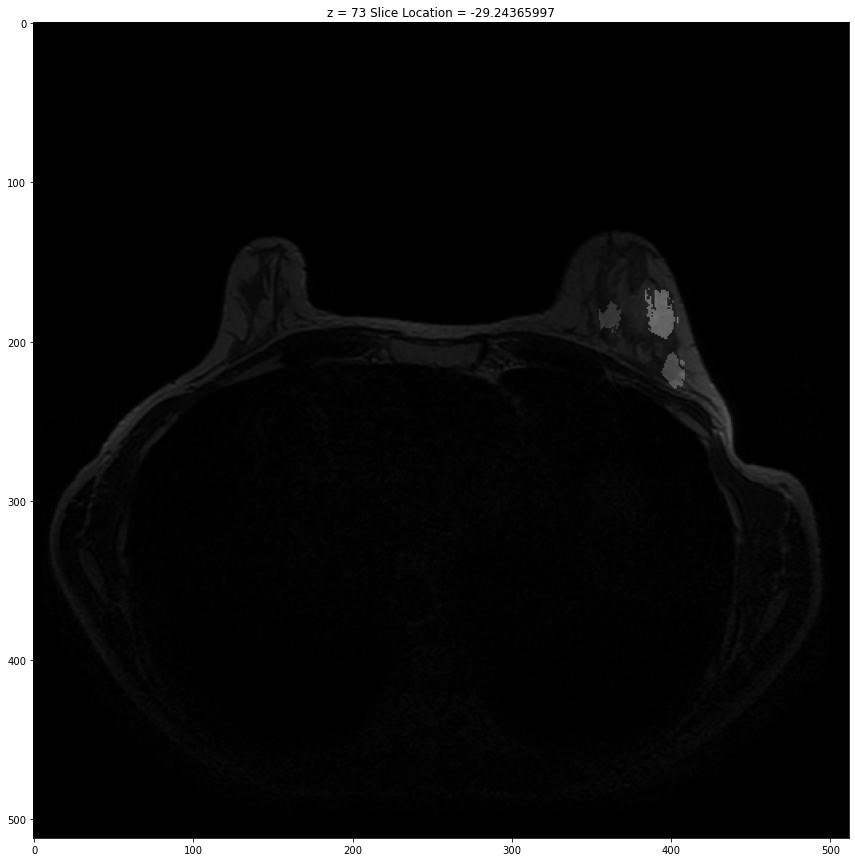

In [50]:
z = 73
plt.figure(figsize = (15,15))
plt.imshow(patient_3d_model[z, :, :], cmap=plt.cm.gray)
plt.imshow(rois[0]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.3)
plt.imshow(rois[1]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.3)
plt.imshow(rois[2]["roi"][z,:,:], cmap=plt.cm.gray, alpha=0.3)
plt.title(f"z = {z} Slice Location = {slices[z].SliceLocation}")

# Output a dataset with both DICOM and ROI files associations

In [59]:
df = pd.read_excel(
    "Advanced-MRI-Breast-Lesions-DA-Clinical-Sep2024.xlsx",
    header = 1,
    index_col = 0
    )
df = df[[
    "tumor/benign1",
    "pos1",
    "tumor/benign2",
    "pos2",
    "tumor/benign3",
    "pos3",
    "tumor/benign4",
    "pos4",
    "tumor/benign5",
    "pos5",
    "tumor/benign6",
    "pos6",
]]
#df.drop(["Unnamed: 2", "Unnamed: 18", "Unnamed: 31", "Unnamed: 44"], axis=1,inplace=True) # dropping empty columns

In [60]:
df = df[-10:]

In [61]:
df

tumor/benign1     pos1  tumor/benign2     pos2  tumor/benign3  \
Patient ID                                                                  
AMBL-623              1.0   L90.94            NaN      NaN            NaN   
AMBL-624              NaN      NaN            NaN      NaN            NaN   
AMBL-625              1.0     R2.9            0.0  L-49.10            NaN   
AMBL-626              0.0    R4.40            0.0    R12.4            NaN   
AMBL-627              1.0  L-48.17            0.0   R35.83            0.0   
AMBL-628              1.0   L12.81            NaN      NaN            NaN   
AMBL-629              0.0   L39.93            0.0   R-2.07            0.0   
AMBL-630              NaN      NaN            NaN      NaN            NaN   
AMBL-631              1.0   L33.93            1.0   L25.93            NaN   
AMBL-632              1.0   L20.22            NaN      NaN            NaN   

               pos3  tumor/benign4   pos4  tumor/benign5     pos5  \
Patient ID                                                          
AMBL-623        NaN            NaN    NaN            NaN      NaN   
AMBL-624        NaN            NaN    NaN            NaN      NaN   
AMBL-625        NaN            NaN    NaN            NaN      NaN   
AMBL-626        NaN            NaN    NaN            NaN      NaN   
AMBL-627    R-36.17            NaN    NaN            NaN      NaN   
AMBL-628        NaN            NaN    NaN            NaN      NaN   
AMBL-629    R-20.07            0.0  R1.93            0.0  R-48.07   
AMBL-630        NaN            NaN    NaN            NaN      NaN   
AMBL-631        NaN            NaN    NaN            NaN      NaN   
AMBL-632        NaN            NaN    NaN            NaN      NaN   

            tumor/benign6     pos6  
Patient ID                          
AMBL-623              NaN      NaN  
AMBL-624              NaN      NaN  
AMBL-625              NaN      NaN  
AMBL-626              NaN      NaN  
AMBL-627              NaN      NaN  
AMBL-628              NaN      NaN  
AMBL-629              0.0  R-32.07  
AMBL-630              NaN      NaN  
AMBL-631              NaN      NaN  
AMBL-632              NaN      NaN

## Assign AX T2 FSE and ROI to each patient

In [62]:
# path of directory Advanced MRI Breast Lesions
directory = "/media/bendico765/Crucial X9/MRI Lesions/manifest-1728494830954/Advanced-MRI-Breast-Lesions"

In [63]:
dcms = []
rois = []

for patient_id in df.index:
    # load the slices and get the 3d shape of the patient
    dcm_path = [roots for roots, dirs, files in os.walk(f"{directory}/{patient_id}") if "Registered Ax T2 FSE" in roots][0]
    dcms.append(dcm_path)
    
    roi_path = [roots for roots, dirs, files in os.walk(f"{directory}/{patient_id}") if "ROI" in roots]
    if len(roi_path) != 0:
        roi_path = roi_path[0]
        rois.append(f"{roi_path}/1-1.dcm")
    else:
        rois.append(np.NaN)
        
df["Registered Ax T2 FSE path"] = dcms
df["Roi path"] = rois

In [64]:
df

tumor/benign1     pos1  tumor/benign2     pos2  tumor/benign3  \
Patient ID                                                                  
AMBL-623              1.0   L90.94            NaN      NaN            NaN   
AMBL-624              NaN      NaN            NaN      NaN            NaN   
AMBL-625              1.0     R2.9            0.0  L-49.10            NaN   
AMBL-626              0.0    R4.40            0.0    R12.4            NaN   
AMBL-627              1.0  L-48.17            0.0   R35.83            0.0   
AMBL-628              1.0   L12.81            NaN      NaN            NaN   
AMBL-629              0.0   L39.93            0.0   R-2.07            0.0   
AMBL-630              NaN      NaN            NaN      NaN            NaN   
AMBL-631              1.0   L33.93            1.0   L25.93            NaN   
AMBL-632              1.0   L20.22            NaN      NaN            NaN   

               pos3  tumor/benign4   pos4  tumor/benign5     pos5  \
Patient ID                                                          
AMBL-623        NaN            NaN    NaN            NaN      NaN   
AMBL-624        NaN            NaN    NaN            NaN      NaN   
AMBL-625        NaN            NaN    NaN            NaN      NaN   
AMBL-626        NaN            NaN    NaN            NaN      NaN   
AMBL-627    R-36.17            NaN    NaN            NaN      NaN   
AMBL-628        NaN            NaN    NaN            NaN      NaN   
AMBL-629    R-20.07            0.0  R1.93            0.0  R-48.07   
AMBL-630        NaN            NaN    NaN            NaN      NaN   
AMBL-631        NaN            NaN    NaN            NaN      NaN   
AMBL-632        NaN            NaN    NaN            NaN      NaN   

            tumor/benign6     pos6  \
Patient ID                           
AMBL-623              NaN      NaN   
AMBL-624              NaN      NaN   
AMBL-625              NaN      NaN   
AMBL-626              NaN      NaN   
AMBL-627              NaN      NaN   
AMBL-628              NaN      NaN   
AMBL-629              0.0  R-32.07   
AMBL-630              NaN      NaN   
AMBL-631              NaN      NaN   
AMBL-632              NaN      NaN   

                                    Registered Ax T2 FSE path  \
Patient ID                                                      
AMBL-623    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-624    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-625    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-626    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-627    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-628    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-629    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-630    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-631    /media/bendico765/Crucial X9/MRI Lesions/manif...   
AMBL-632    /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                                     Roi path  
Patient ID                                                     
AMBL-623    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-624                                                  NaN  
AMBL-625    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-626    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-627    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-628    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-629    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-630                                                  NaN  
AMBL-631    /media/bendico765/Crucial X9/MRI Lesions/manif...  
AMBL-632    /media/bendico765/Crucial X9/MRI Lesions/manif...

### Create an entry for each dataframe

In [65]:
# for each entry, reformat it by creating a row for each lesion column
l = [
    [
        [
            index,
            1,
            row["tumor/benign1"],
            row["pos1"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ],
        [
            index,
            2,
            row["tumor/benign2"],
            row["pos2"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ],
        [
            index,
            3,
            row["tumor/benign3"],
            row["pos3"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ],
        [
            index,
            4,
            row["tumor/benign4"],
            row["pos4"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ],
        [
            index,
            5,
            row["tumor/benign5"],
            row["pos5"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ],
        [
            index,
            6,
            row["tumor/benign6"],
            row["pos6"],
            row["Registered Ax T2 FSE path"],
            row["Roi path"]
        ]
    ]
    for index, row in df.iterrows()
]

l = [ e2 for e1 in l[:] for e2 in e1 ]

In [66]:
lesions_df = pd.DataFrame(
    l,
    columns = ["Patient ID", "lesion idx", "tumor/benign", "pos", "Registered Ax T2 FSE path", "Roi path"]
)

# substitute -1 with nan values
lesions_df["tumor/benign"] = lesions_df["tumor/benign"].replace(-1, np.NaN)
lesions_df["pos"] = lesions_df["pos"].replace(-1, np.NaN)

# subtract -1 from the indexes
lesions_df["lesion idx"] = pd.to_numeric(lesions_df["lesion idx"]) -1 

# drop the empty row
lesions_df.dropna(subset=["tumor/benign", "pos"], inplace = True) 

# instead of a generic pos, create a column for the slice and one for the position
lesions_df["Slice Location"] = lesions_df["pos"].apply(lambda x: x[1:] if str(x) != "nan" else np.NaN)
lesions_df["Breast"] = lesions_df["pos"].apply(lambda x: x[:1] if str(x) != "nan" else np.NaN)
lesions_df.drop(columns=["pos"], inplace=True)

# cast the slice location column from string to int
lesions_df["Slice Location"] = pd.to_numeric(lesions_df["Slice Location"])

In [67]:
lesions_df

Patient ID  lesion idx  tumor/benign  \
0    AMBL-623           0           1.0   
12   AMBL-625           0           1.0   
13   AMBL-625           1           0.0   
18   AMBL-626           0           0.0   
19   AMBL-626           1           0.0   
24   AMBL-627           0           1.0   
25   AMBL-627           1           0.0   
26   AMBL-627           2           0.0   
30   AMBL-628           0           1.0   
36   AMBL-629           0           0.0   
37   AMBL-629           1           0.0   
38   AMBL-629           2           0.0   
39   AMBL-629           3           0.0   
40   AMBL-629           4           0.0   
41   AMBL-629           5           0.0   
48   AMBL-631           0           1.0   
49   AMBL-631           1           1.0   
54   AMBL-632           0           1.0   

                            Registered Ax T2 FSE path  \
0   /media/bendico765/Crucial X9/MRI Lesions/manif...   
12  /media/bendico765/Crucial X9/MRI Lesions/manif...   
13  /media/bendico765/Crucial X9/MRI Lesions/manif...   
18  /media/bendico765/Crucial X9/MRI Lesions/manif...   
19  /media/bendico765/Crucial X9/MRI Lesions/manif...   
24  /media/bendico765/Crucial X9/MRI Lesions/manif...   
25  /media/bendico765/Crucial X9/MRI Lesions/manif...   
26  /media/bendico765/Crucial X9/MRI Lesions/manif...   
30  /media/bendico765/Crucial X9/MRI Lesions/manif...   
36  /media/bendico765/Crucial X9/MRI Lesions/manif...   
37  /media/bendico765/Crucial X9/MRI Lesions/manif...   
38  /media/bendico765/Crucial X9/MRI Lesions/manif...   
39  /media/bendico765/Crucial X9/MRI Lesions/manif...   
40  /media/bendico765/Crucial X9/MRI Lesions/manif...   
41  /media/bendico765/Crucial X9/MRI Lesions/manif...   
48  /media/bendico765/Crucial X9/MRI Lesions/manif...   
49  /media/bendico765/Crucial X9/MRI Lesions/manif...   
54  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                             Roi path  Slice Location Breast  
0   /media/bendico765/Crucial X9/MRI Lesions/manif...           90.94      L  
12  /media/bendico765/Crucial X9/MRI Lesions/manif...            2.90      R  
13  /media/bendico765/Crucial X9/MRI Lesions/manif...          -49.10      L  
18  /media/bendico765/Crucial X9/MRI Lesions/manif...            4.40      R  
19  /media/bendico765/Crucial X9/MRI Lesions/manif...           12.40      R  
24  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.17      L  
25  /media/bendico765/Crucial X9/MRI Lesions/manif...           35.83      R  
26  /media/bendico765/Crucial X9/MRI Lesions/manif...          -36.17      R  
30  /media/bendico765/Crucial X9/MRI Lesions/manif...           12.81      L  
36  /media/bendico765/Crucial X9/MRI Lesions/manif...           39.93      L  
37  /media/bendico765/Crucial X9/MRI Lesions/manif...           -2.07      R  
38  /media/bendico765/Crucial X9/MRI Lesions/manif...          -20.07      R  
39  /media/bendico765/Crucial X9/MRI Lesions/manif...            1.93      R  
40  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.07      R  
41  /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.07      R  
48  /media/bendico765/Crucial X9/MRI Lesions/manif...           33.93      L  
49  /media/bendico765/Crucial X9/MRI Lesions/manif...           25.93      L  
54  /media/bendico765/Crucial X9/MRI Lesions/manif...           20.22      L

In [68]:
lesions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 54
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient ID                 18 non-null     object 
 1   lesion idx                 18 non-null     int64  
 2   tumor/benign               18 non-null     float64
 3   Registered Ax T2 FSE path  18 non-null     object 
 4   Roi path                   18 non-null     object 
 5   Slice Location             18 non-null     float64
 6   Breast                     18 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ KB


There **117 lesions** annotated in the excel file which don't have a corresponding ROI file. Of the 164 remaining lesions which have a dicom file, half are benign and half are malign.

In [69]:
lesions_df[lesions_df["Roi path"].isna()]

Empty DataFrame
Columns: [Patient ID, lesion idx, tumor/benign, Registered Ax T2 FSE path, Roi path, Slice Location, Breast]
Index: []

In [70]:
lesions_df[~lesions_df["Roi path"].isna()]["tumor/benign"].value_counts()

tumor/benign
0.0    11
1.0     7
Name: count, dtype: int64

In [72]:
inconsistent_patients = [
    "AMBL-626",
    "AMBL-631"
]

In [77]:
inconsistent_df = lesions_df[lesions_df["Patient ID"].isin(inconsistent_patients)]
inconsistent_df

Patient ID  lesion idx  tumor/benign  \
18   AMBL-626           0           0.0   
19   AMBL-626           1           0.0   
48   AMBL-631           0           1.0   
49   AMBL-631           1           1.0   

                            Registered Ax T2 FSE path  \
18  /media/bendico765/Crucial X9/MRI Lesions/manif...   
19  /media/bendico765/Crucial X9/MRI Lesions/manif...   
48  /media/bendico765/Crucial X9/MRI Lesions/manif...   
49  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                             Roi path  Slice Location Breast  
18  /media/bendico765/Crucial X9/MRI Lesions/manif...            4.40      R  
19  /media/bendico765/Crucial X9/MRI Lesions/manif...           12.40      R  
48  /media/bendico765/Crucial X9/MRI Lesions/manif...           33.93      L  
49  /media/bendico765/Crucial X9/MRI Lesions/manif...           25.93      L

In [78]:
lesions_df = lesions_df[~ lesions_df["Patient ID"].isin(inconsistent_patients)]
lesions_df

Patient ID  lesion idx  tumor/benign  \
0    AMBL-623           0           1.0   
12   AMBL-625           0           1.0   
13   AMBL-625           1           0.0   
24   AMBL-627           0           1.0   
25   AMBL-627           1           0.0   
26   AMBL-627           2           0.0   
30   AMBL-628           0           1.0   
36   AMBL-629           0           0.0   
37   AMBL-629           1           0.0   
38   AMBL-629           2           0.0   
39   AMBL-629           3           0.0   
40   AMBL-629           4           0.0   
41   AMBL-629           5           0.0   
54   AMBL-632           0           1.0   

                            Registered Ax T2 FSE path  \
0   /media/bendico765/Crucial X9/MRI Lesions/manif...   
12  /media/bendico765/Crucial X9/MRI Lesions/manif...   
13  /media/bendico765/Crucial X9/MRI Lesions/manif...   
24  /media/bendico765/Crucial X9/MRI Lesions/manif...   
25  /media/bendico765/Crucial X9/MRI Lesions/manif...   
26  /media/bendico765/Crucial X9/MRI Lesions/manif...   
30  /media/bendico765/Crucial X9/MRI Lesions/manif...   
36  /media/bendico765/Crucial X9/MRI Lesions/manif...   
37  /media/bendico765/Crucial X9/MRI Lesions/manif...   
38  /media/bendico765/Crucial X9/MRI Lesions/manif...   
39  /media/bendico765/Crucial X9/MRI Lesions/manif...   
40  /media/bendico765/Crucial X9/MRI Lesions/manif...   
41  /media/bendico765/Crucial X9/MRI Lesions/manif...   
54  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                             Roi path  Slice Location Breast  
0   /media/bendico765/Crucial X9/MRI Lesions/manif...           90.94      L  
12  /media/bendico765/Crucial X9/MRI Lesions/manif...            2.90      R  
13  /media/bendico765/Crucial X9/MRI Lesions/manif...          -49.10      L  
24  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.17      L  
25  /media/bendico765/Crucial X9/MRI Lesions/manif...           35.83      R  
26  /media/bendico765/Crucial X9/MRI Lesions/manif...          -36.17      R  
30  /media/bendico765/Crucial X9/MRI Lesions/manif...           12.81      L  
36  /media/bendico765/Crucial X9/MRI Lesions/manif...           39.93      L  
37  /media/bendico765/Crucial X9/MRI Lesions/manif...           -2.07      R  
38  /media/bendico765/Crucial X9/MRI Lesions/manif...          -20.07      R  
39  /media/bendico765/Crucial X9/MRI Lesions/manif...            1.93      R  
40  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.07      R  
41  /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.07      R  
54  /media/bendico765/Crucial X9/MRI Lesions/manif...           20.22      L

### To each lesion associate the corrisponding pixel data

In [18]:
lesion_pixel_array = []
z_indexes = []
y_indexes = []
x_indexes = []
z_offset_array = []
y_offset_array = []
x_offset_array = []

for _, row in lesions_df.iterrows():  
    if pd.isnull(row["Roi path"]):
        lesion_pixel_array.append(np.NaN)
        z_indexes.append(np.NaN)
        y_indexes.append(np.NaN)
        x_indexes.append(np.NaN)
        z_offset_array.append(np.NaN)
        y_offset_array.append(np.NaN)
        x_offset_array.append(np.NaN)
        continue
        
    if row["lesion idx"] == 0: # if it is the firt lesion of the patient, open up the dicom files of MRI and ROI
        patient_slices = read_dicomdir(row["Registered Ax T2 FSE path"])
        patient_3d_model = get_3d_shape(patient_slices)
        slices_per_file = patient_3d_model.shape[0]
        slice_thickness = patient_slices[0].SliceThickness
        
        roi = pydicom.dcmread(row["Roi path"])
        rois = read_3d_rois(roi, slices_per_file)

    candidate_rois = []
    
    # check for each lesion if it is localized on the left of right side
    mean = lambda l: sum(l)/len(l) if len(l) != 0 else 0    
    for roi in rois: 
        side = row["Breast"]
        if mean(roi["x_indexes"]) < 256: # closer to the left part of the image
            if side == "L":
                candidate_rois.append(roi)
        else:
            if side == "R":
                candidate_rois.append(roi)
    
    if( len(candidate_rois) == 0 ):
        print(f'[{row["Patient ID"]}] [{row["Breast"]}] [{row["Slice Location"]}] No candidate ROI')
        lesion_pixel_array.append(np.NaN)
        z_indexes.append(np.NaN)
        y_indexes.append(np.NaN)
        x_indexes.append(np.NaN)
        z_offset_array.append(np.NaN)
        y_offset_array.append(np.NaN)
        x_offset_array.append(np.NaN)
        continue
    
    if( len(candidate_rois) > 1 ):
        picked_roi = False
        for roi in candidate_rois:
            min_z = min(roi["z_indexes"])
            max_z = max(roi["z_indexes"])
            
            max_slice = max(patient_slices[min_z].SliceLocation, patient_slices[max_z].SliceLocation)
            min_slice = min(patient_slices[min_z].SliceLocation, patient_slices[max_z].SliceLocation)
            
            if min_slice <= row["Slice Location"] <= max_slice or (abs(row["Slice Location"] - max_slice) <= slice_thickness or abs(row["Slice Location"] - min_slice) <= slice_thickness):
                lesion_pixel_array.append(roi["roi"])
                z_indexes.append(roi["z_indexes"])
                y_indexes.append(roi["y_indexes"])
                x_indexes.append(roi["x_indexes"])
                
                z_offset, y_offset, x_offset = get_roi_size(roi)
                z_offset_array.append(z_offset)
                y_offset_array.append(y_offset)
                x_offset_array.append(x_offset)
                
                picked_roi = True
                break
        
        if picked_roi == False:
            raise Exception(f'[{row["Patient ID"]}] [{row["Breast"]}] [{row["Slice Location"]}] Impossible to pick a ROI')
    else:
        lesion_pixel_array.append(candidate_rois[0]["roi"])
        z_indexes.append(candidate_rois[0]["z_indexes"])
        y_indexes.append(candidate_rois[0]["y_indexes"])
        x_indexes.append(candidate_rois[0]["x_indexes"])
        
        z_offset, y_offset, x_offset = get_roi_size(candidate_rois[0])
        z_offset_array.append(z_offset)
        y_offset_array.append(y_offset)
        x_offset_array.append(x_offset)

lesions_df["Pixel array"] = lesion_pixel_array
lesions_df["z_indexes"] = z_indexes
lesions_df["y_indexes"] = y_indexes
lesions_df["x_indexes"] = x_indexes
lesions_df["z_offset"] = z_offset_array
lesions_df["y_offset"] = y_offset_array
lesions_df["x_offset"] = x_offset_array

[AMBL-595] [R] [-45.34] No candidate ROI


### Manually fix the inconsistencies

In [ ]:
inconsistent_dicit = {}
for patient_id in inconsistent_patients:
    

In [ ]:
inconsistent_df["Pixel array"] = 

### Check the presence of duplicates 

In [37]:
# check the presence of duplicates among the lesions
dropped_lesions_df = lesions_df[lesions_df["Pixel array"].isna()]
lesions_df = lesions_df.dropna(subset=["Pixel array"])

In [38]:
lesions_df

Patient ID  lesion idx  tumor/benign  \
0      AMBL-001           1           1.0   
1      AMBL-001           2           1.0   
12     AMBL-003           1           1.0   
18     AMBL-004           1           0.0   
24     AMBL-005           1           1.0   
...         ...         ...           ...   
1180   AMBL-629           5           0.0   
1181   AMBL-629           6           0.0   
1188   AMBL-631           1           1.0   
1189   AMBL-631           2           1.0   
1194   AMBL-632           1           1.0   

                              Registered Ax T2 FSE path  \
0     /media/bendico765/Crucial X9/MRI Lesions/manif...   
1     /media/bendico765/Crucial X9/MRI Lesions/manif...   
12    /media/bendico765/Crucial X9/MRI Lesions/manif...   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...   
24    /media/bendico765/Crucial X9/MRI Lesions/manif...   
...                                                 ...   
1180  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1181  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1194  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                               Roi path  Slice Location  \
0     /media/bendico765/Crucial X9/MRI Lesions/manif...          -60.85   
1     /media/bendico765/Crucial X9/MRI Lesions/manif...          -56.85   
12    /media/bendico765/Crucial X9/MRI Lesions/manif...           -2.76   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...          -51.98   
24    /media/bendico765/Crucial X9/MRI Lesions/manif...          -28.46   
...                                                 ...             ...   
1180  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.07   
1181  /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.07   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...           33.93   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...           25.93   
1194  /media/bendico765/Crucial X9/MRI Lesions/manif...           20.22   

     Breast                                        Pixel array  \
0         L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
1         R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
12        R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
18        L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
24        R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
...     ...                                                ...   
1180      R  {'z_indexes': [81, 82], 'y_indexes': [147, 148...   
1181      R  {'z_indexes': [73, 74, 75], 'y_indexes': [156,...   
1188      L  {'z_indexes': [37, 38, 39, 40, 41, 42, 43, 44,...   
1189      L  {'z_indexes': [37, 38, 39, 40, 41, 42, 43, 44,...   
1194      L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                                              z_indexes  \
0                              [82, 83, 84, 85, 86, 87]   
1                                      [82, 83, 84, 85]   
12                         [49, 50, 51, 52, 53, 54, 55]   
18                                 [81, 82, 83, 84, 85]   
24    [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...   
...                                                 ...   
1180                                           [81, 82]   
1181                                       [73, 74, 75]   
1188  [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...   
1189  [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...   
1194                   [60, 61, 62, 63, 64, 65, 66, 67]   

                                              y_indexes  \
0     [172, 173, 174, 175, 176, 177, 178, 179, 180, ...   
1     [188, 189, 190, 191, 192, 193, 194, 195, 196, ...   
12    [178, 179, 180, 181, 182, 183, 184, 185, 186, ...   
18    [163, 164, 165, 166, 167, 168, 169, 170, 171, ...   
24    [194, 195, 196, 197, 198, 199, 200, 201, 202, ...  

In [40]:
duplicated_df = lesions_df[lesions_df.duplicated(subset=["z_offset", "y_offset", "x_offset"], keep=False)]

Patient ID  lesion idx  tumor/benign  \
1052   AMBL-608           3           0.0   
61     AMBL-011           2           0.0   
781    AMBL-563           2           0.0   
1123   AMBL-620           2           0.0   
848    AMBL-574           3           0.0   
847    AMBL-574           2           0.0   
838    AMBL-572           5           0.0   
835    AMBL-572           2           1.0   
849    AMBL-574           4           0.0   
133    AMBL-023           2           0.0   
132    AMBL-023           1           0.0   
1179   AMBL-629           4           0.0   
288    AMBL-049           1           0.0   
1177   AMBL-629           2           0.0   
871    AMBL-578           2           0.0   
810    AMBL-568           1           1.0   
834    AMBL-572           1           1.0   
18     AMBL-004           1           0.0   
762    AMBL-559           1           0.0   
877    AMBL-579           2           1.0   
876    AMBL-579           1           1.0   
945    AMBL-590           4           0.0   
1158   AMBL-626           1           0.0   
1159   AMBL-626           2           0.0   
944    AMBL-590           3           0.0   
1188   AMBL-631           1           1.0   
1189   AMBL-631           2           1.0   

                              Registered Ax T2 FSE path  \
1052  /media/bendico765/Crucial X9/MRI Lesions/manif...   
61    /media/bendico765/Crucial X9/MRI Lesions/manif...   
781   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1123  /media/bendico765/Crucial X9/MRI Lesions/manif...   
848   /media/bendico765/Crucial X9/MRI Lesions/manif...   
847   /media/bendico765/Crucial X9/MRI Lesions/manif...   
838   /media/bendico765/Crucial X9/MRI Lesions/manif...   
835   /media/bendico765/Crucial X9/MRI Lesions/manif...   
849   /media/bendico765/Crucial X9/MRI Lesions/manif...   
133   /media/bendico765/Crucial X9/MRI Lesions/manif...   
132   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1179  /media/bendico765/Crucial X9/MRI Lesions/manif...   
288   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1177  /media/bendico765/Crucial X9/MRI Lesions/manif...   
871   /media/bendico765/Crucial X9/MRI Lesions/manif...   
810   /media/bendico765/Crucial X9/MRI Lesions/manif...   
834   /media/bendico765/Crucial X9/MRI Lesions/manif...   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...   
762   /media/bendico765/Crucial X9/MRI Lesions/manif...   
877   /media/bendico765/Crucial X9/MRI Lesions/manif...   
876   /media/bendico765/Crucial X9/MRI Lesions/manif...   
945   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1158  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1159  /media/bendico765/Crucial X9/MRI Lesions/manif...   
944   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                               Roi path  Slice Location  \
1052  /media/bendico765/Crucial X9/MRI Lesions/manif...            4.01   
61    /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.84   
781   /media/bendico765/Crucial X9/MRI Lesions/manif...            7.04   
1123  /media/bendico765/Crucial X9/MRI Lesions/manif...           19.34   
848   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.40   
847   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.24   
838   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.00   
835   /media/bendico765/Crucial X9/MRI Lesions/manif...          -21.00   
849   /media/bendico765/Crucial X9/MRI Lesions/manif...          -31.24   
133   /media/bendico765/Crucial X9/MRI Lesions/manif...          -58.73   
132   /media/bendico765/Crucial X9/MRI Lesions/manif...          -14.63   
1179  /media/bendico765/Crucial X9/MRI Lesions/manif...            1.93   
288   /media/bendico765/Crucial X9/MRI Lesions/manif...           13.80   
1177  /media/bendico765/Crucial X9/MRI Le

In [41]:
duplicated_df.sort_values(by=["z_offset", "y_offset", "x_offset"])

Patient ID  lesion idx  tumor/benign  \
1052   AMBL-608           3           0.0   
1123   AMBL-620           2           0.0   
61     AMBL-011           2           0.0   
781    AMBL-563           2           0.0   
132    AMBL-023           1           0.0   
133    AMBL-023           2           0.0   
835    AMBL-572           2           1.0   
838    AMBL-572           5           0.0   
847    AMBL-574           2           0.0   
848    AMBL-574           3           0.0   
849    AMBL-574           4           0.0   
288    AMBL-049           1           0.0   
810    AMBL-568           1           1.0   
834    AMBL-572           1           1.0   
871    AMBL-578           2           0.0   
1177   AMBL-629           2           0.0   
1179   AMBL-629           4           0.0   
18     AMBL-004           1           0.0   
762    AMBL-559           1           0.0   
876    AMBL-579           1           1.0   
877    AMBL-579           2           1.0   
944    AMBL-590           3           0.0   
945    AMBL-590           4           0.0   
1158   AMBL-626           1           0.0   
1159   AMBL-626           2           0.0   
1188   AMBL-631           1           1.0   
1189   AMBL-631           2           1.0   

                              Registered Ax T2 FSE path  \
1052  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1123  /media/bendico765/Crucial X9/MRI Lesions/manif...   
61    /media/bendico765/Crucial X9/MRI Lesions/manif...   
781   /media/bendico765/Crucial X9/MRI Lesions/manif...   
132   /media/bendico765/Crucial X9/MRI Lesions/manif...   
133   /media/bendico765/Crucial X9/MRI Lesions/manif...   
835   /media/bendico765/Crucial X9/MRI Lesions/manif...   
838   /media/bendico765/Crucial X9/MRI Lesions/manif...   
847   /media/bendico765/Crucial X9/MRI Lesions/manif...   
848   /media/bendico765/Crucial X9/MRI Lesions/manif...   
849   /media/bendico765/Crucial X9/MRI Lesions/manif...   
288   /media/bendico765/Crucial X9/MRI Lesions/manif...   
810   /media/bendico765/Crucial X9/MRI Lesions/manif...   
834   /media/bendico765/Crucial X9/MRI Lesions/manif...   
871   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1177  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1179  /media/bendico765/Crucial X9/MRI Lesions/manif...   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...   
762   /media/bendico765/Crucial X9/MRI Lesions/manif...   
876   /media/bendico765/Crucial X9/MRI Lesions/manif...   
877   /media/bendico765/Crucial X9/MRI Lesions/manif...   
944   /media/bendico765/Crucial X9/MRI Lesions/manif...   
945   /media/bendico765/Crucial X9/MRI Lesions/manif...   
1158  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1159  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                               Roi path  Slice Location  \
1052  /media/bendico765/Crucial X9/MRI Lesions/manif...            4.01   
1123  /media/bendico765/Crucial X9/MRI Lesions/manif...           19.34   
61    /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.84   
781   /media/bendico765/Crucial X9/MRI Lesions/manif...            7.04   
132   /media/bendico765/Crucial X9/MRI Lesions/manif...          -14.63   
133   /media/bendico765/Crucial X9/MRI Lesions/manif...          -58.73   
835   /media/bendico765/Crucial X9/MRI Lesions/manif...          -21.00   
838   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.00   
847   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.24   
848   /media/bendico765/Crucial X9/MRI Lesions/manif...          -27.40   
849   /media/bendico765/Crucial X9/MRI Lesions/manif...          -31.24   
288   /media/bendico765/Crucial X9/MRI Lesions/manif...           13.80   
810   /media/bendico765/Crucial X9/MRI Lesions/manif...            9.96   
834   /media/bendico765/Crucial X9/MRI Le

In [19]:
lesions_df

Patient ID  lesion idx  tumor/benign  \
0      AMBL-001           1           1.0   
1      AMBL-001           2           1.0   
12     AMBL-003           1           1.0   
18     AMBL-004           1           0.0   
24     AMBL-005           1           1.0   
...         ...         ...           ...   
1180   AMBL-629           5           0.0   
1181   AMBL-629           6           0.0   
1188   AMBL-631           1           1.0   
1189   AMBL-631           2           1.0   
1194   AMBL-632           1           1.0   

                              Registered Ax T2 FSE path  \
0     /media/bendico765/Crucial X9/MRI Lesions/manif...   
1     /media/bendico765/Crucial X9/MRI Lesions/manif...   
12    /media/bendico765/Crucial X9/MRI Lesions/manif...   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...   
24    /media/bendico765/Crucial X9/MRI Lesions/manif...   
...                                                 ...   
1180  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1181  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...   
1194  /media/bendico765/Crucial X9/MRI Lesions/manif...   

                                               Roi path  Slice Location  \
0     /media/bendico765/Crucial X9/MRI Lesions/manif...          -60.85   
1     /media/bendico765/Crucial X9/MRI Lesions/manif...          -56.85   
12    /media/bendico765/Crucial X9/MRI Lesions/manif...           -2.76   
18    /media/bendico765/Crucial X9/MRI Lesions/manif...          -51.98   
24    /media/bendico765/Crucial X9/MRI Lesions/manif...          -28.46   
...                                                 ...             ...   
1180  /media/bendico765/Crucial X9/MRI Lesions/manif...          -48.07   
1181  /media/bendico765/Crucial X9/MRI Lesions/manif...          -32.07   
1188  /media/bendico765/Crucial X9/MRI Lesions/manif...           33.93   
1189  /media/bendico765/Crucial X9/MRI Lesions/manif...           25.93   
1194  /media/bendico765/Crucial X9/MRI Lesions/manif...           20.22   

     Breast                                        Pixel array  \
0         L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
1         R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
12        R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
18        L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
24        R  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
...     ...                                                ...   
1180      R  {'z_indexes': [81, 82], 'y_indexes': [147, 148...   
1181      R  {'z_indexes': [73, 74, 75], 'y_indexes': [156,...   
1188      L  {'z_indexes': [37, 38, 39, 40, 41, 42, 43, 44,...   
1189      L  {'z_indexes': [37, 38, 39, 40, 41, 42, 43, 44,...   
1194      L  [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                                              z_indexes  \
0                              [82, 83, 84, 85, 86, 87]   
1                                      [82, 83, 84, 85]   
12                         [49, 50, 51, 52, 53, 54, 55]   
18                                 [81, 82, 83, 84, 85]   
24    [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...   
...                                                 ...   
1180                                           [81, 82]   
1181                                       [73, 74, 75]   
1188  [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...   
1189  [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4...   
1194                   [60, 61, 62, 63, 64, 65, 66, 67]   

                                              y_indexes  \
0     [172, 173, 174, 175, 176, 177, 178, 179, 180, ...   
1     [188, 189, 190, 191, 192, 193, 194, 195, 196, ...   
12    [178, 179, 180, 181, 182, 183, 184, 185, 186, ...   
18    [163, 164, 165, 166, 167, 168, 169, 170, 171, ...   
24    [194, 195, 196, 197, 198, 199, 200, 201, 202, ...  

# Checking lesions size

In [76]:
lesions_df[["Patient ID", "tumor/benign", "z_offset", "y_offset", "x_offset"]]

Patient ID  tumor/benign  z_offset  y_offset  x_offset
0    AMBL-001           1.0         6        42        23
1    AMBL-001           1.0         4        46        17
12   AMBL-003           1.0         7        40        21
18   AMBL-004           0.0         5        18        13
24   AMBL-005           1.0        13        55        47
36   AMBL-007           1.0        16        92        50
42   AMBL-008           1.0        23        83        97
43   AMBL-008           0.0         6        24        23
48   AMBL-009           0.0         4        23        35
54   AMBL-010           0.0         9        95        76

In [77]:
lesions_df[["z_offset", "y_offset", "x_offset"]].describe()

z_offset   y_offset   x_offset
count  10.000000  10.000000  10.000000
mean    9.300000  51.800000  40.200000
std     6.219146  28.828227  27.720029
min     4.000000  18.000000  13.000000
25%     5.250000  28.000000  21.500000
50%     6.500000  44.000000  29.000000
75%    12.000000  76.000000  49.250000
max    23.000000  95.000000  97.000000

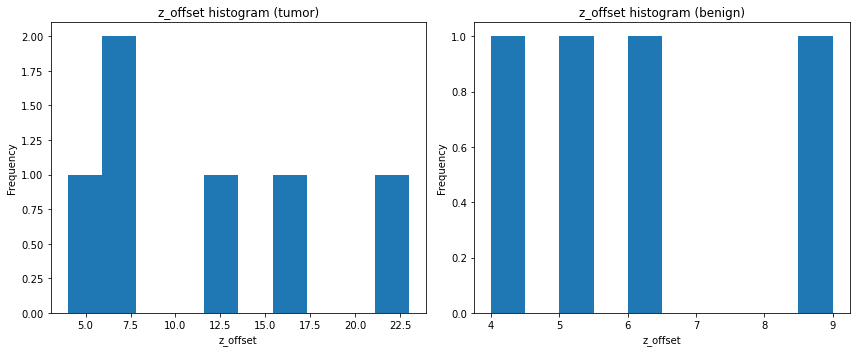

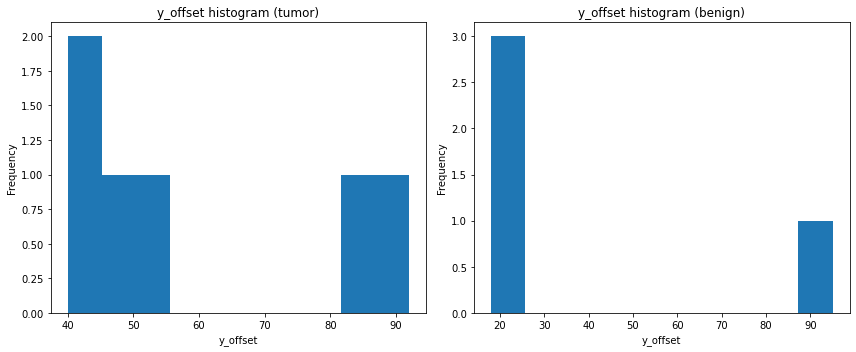

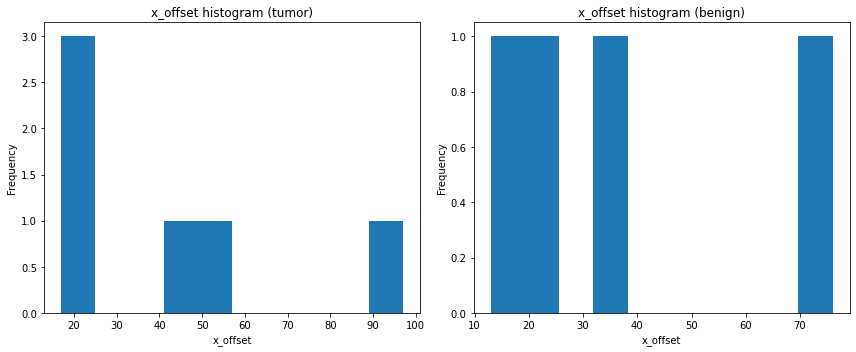

In [79]:
for label in ["z_offset", "y_offset", "x_offset"]:    
    fig, axes = plt.subplots(1,2, figsize=(12,5)) # 1 row, 2 columns
    
    # plot first graph (tumor)
    axes[0].set_title(f'{label} histogram (tumor)')
    axes[0].set_xlabel(label)
    axes[0].set_ylabel("Frequency")
    axes[0].hist(lesions_df[lesions_df["tumor/benign"] == 1 ][label])
    
    # plot first graph (benign)
    axes[1].set_title(f'{label} histogram (benign)')
    axes[1].set_xlabel(label)
    axes[1].set_ylabel("Frequency")
    axes[1].hist(lesions_df[lesions_df["tumor/benign"] == 0 ][label])
    
    plt.tight_layout()
    plt.show()

## Exploring the extremes

## z axis

### tumor

In [80]:
top3_z_tumor_df = lesions_df[lesions_df["tumor/benign"] == 1].sort_values(by="z_offset", ascending=False)[:3]
top3_z_tumor_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "z_offset", "z_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
42   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   
36   AMBL-007  /media/bendico765/Crucial X9/MRI Lesions/manif...   
24   AMBL-005  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  z_offset  \
42          -17.40      L        23   
36            7.78      L        16   
24          -28.46      R        13   

                                            z_indexes  
42  [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6...  
36  [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...  
24  [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...

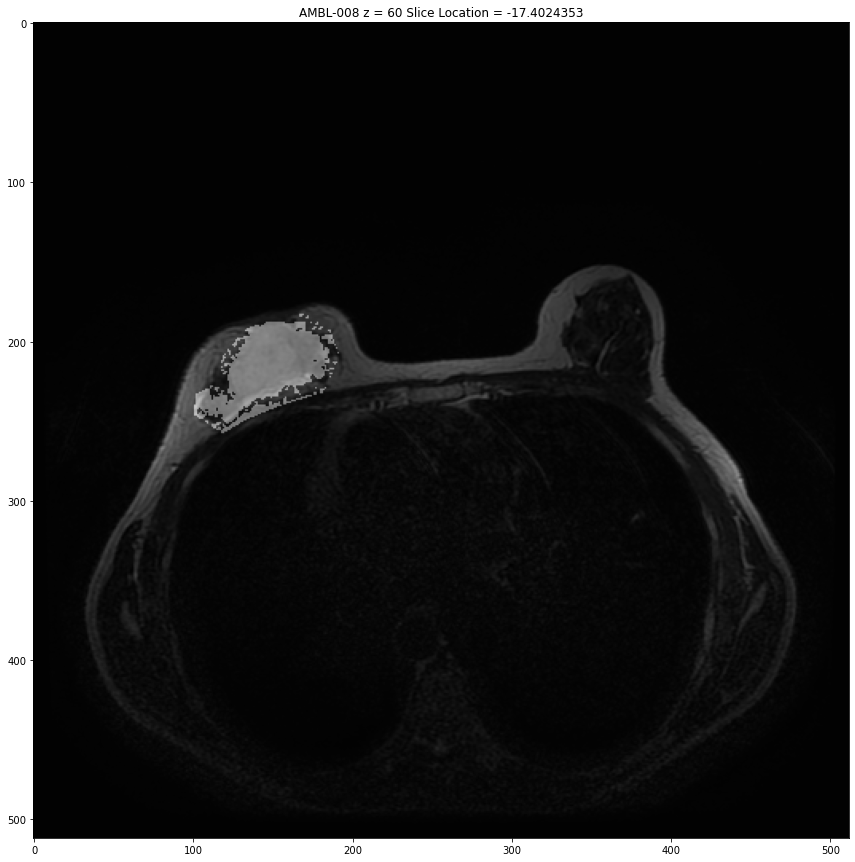

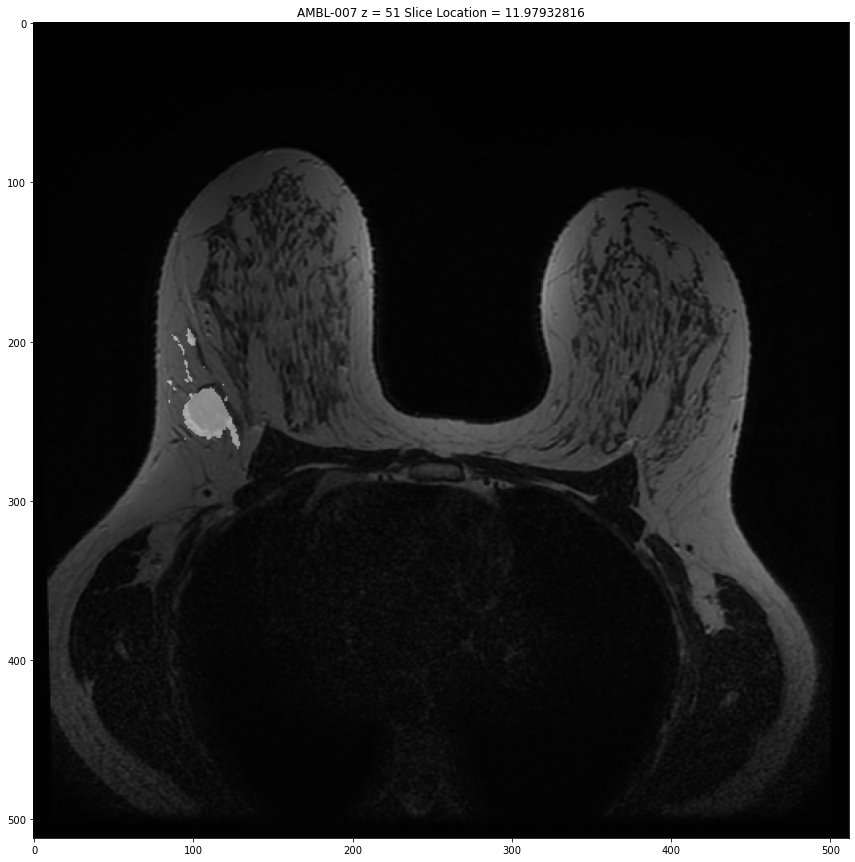

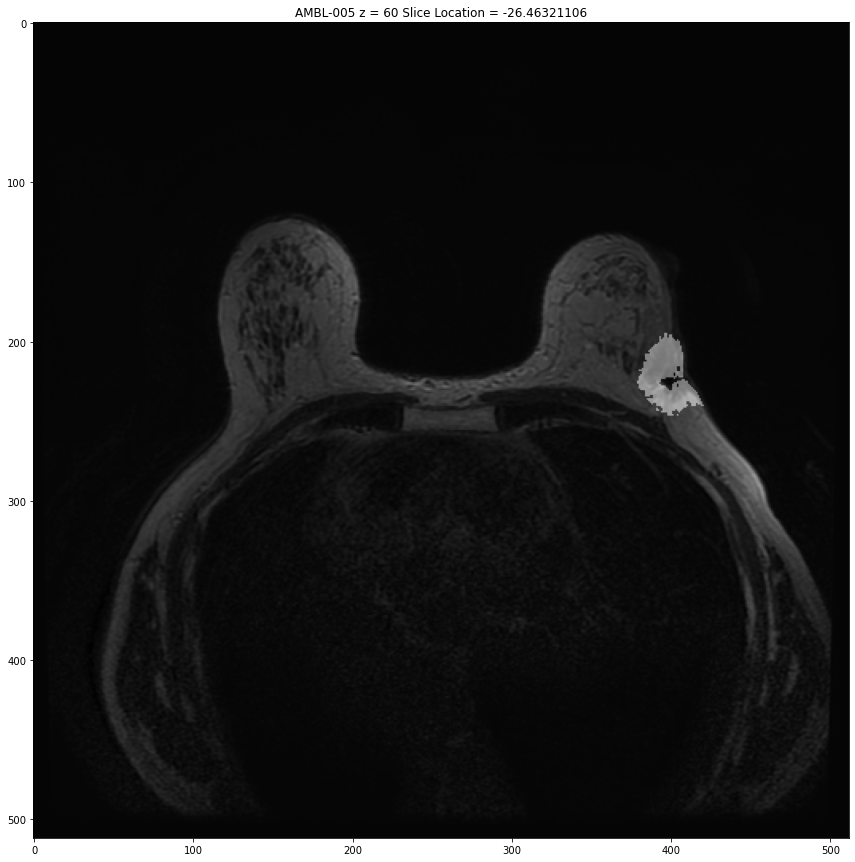

In [81]:
for _, row in top3_z_tumor_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    z = int(np.median(row["z_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[z, :, :], cmap=plt.cm.gray)
    plt.imshow(roi[z,:,:], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} z = {z} Slice Location = {slices[z].SliceLocation}')

### benign

In [84]:
top3_z_benign_df = lesions_df[lesions_df["tumor/benign"] == 0].sort_values(by="z_offset", ascending=False)[:3]
top3_z_benign_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "z_offset", "z_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
54   AMBL-010  /media/bendico765/Crucial X9/MRI Lesions/manif...   
43   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   
18   AMBL-004  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  z_offset                             z_indexes  
54            8.71      R         9  [53, 54, 55, 56, 57, 58, 59, 60, 61]  
43          -33.40      R         6              [66, 67, 68, 69, 70, 71]  
18          -51.98      L         5                  [81, 82, 83, 84, 85]

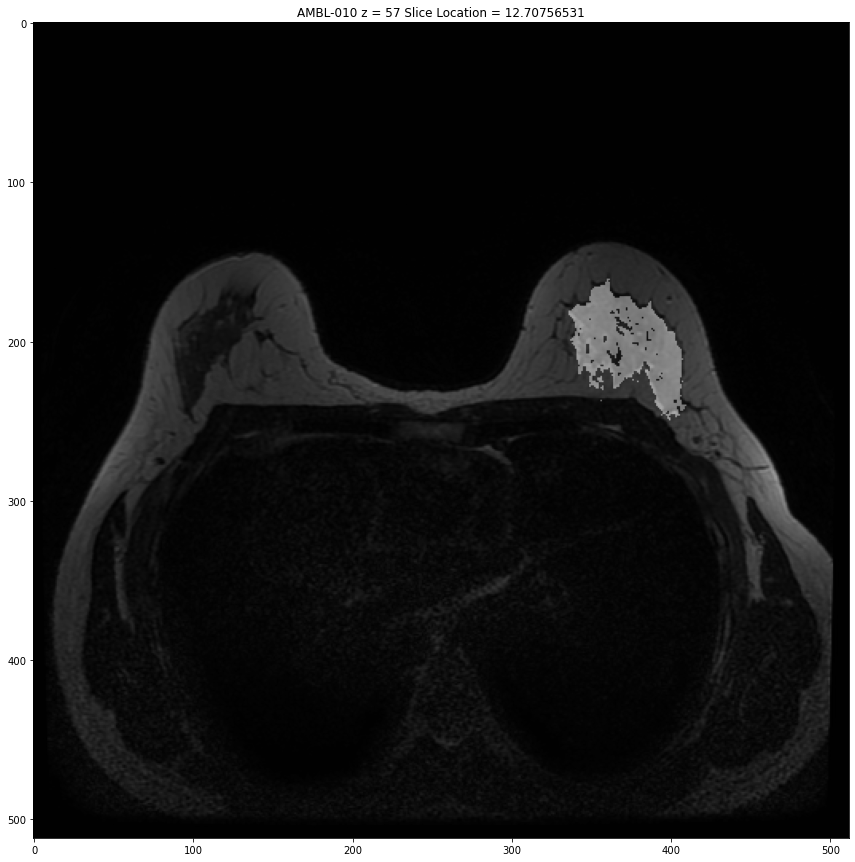

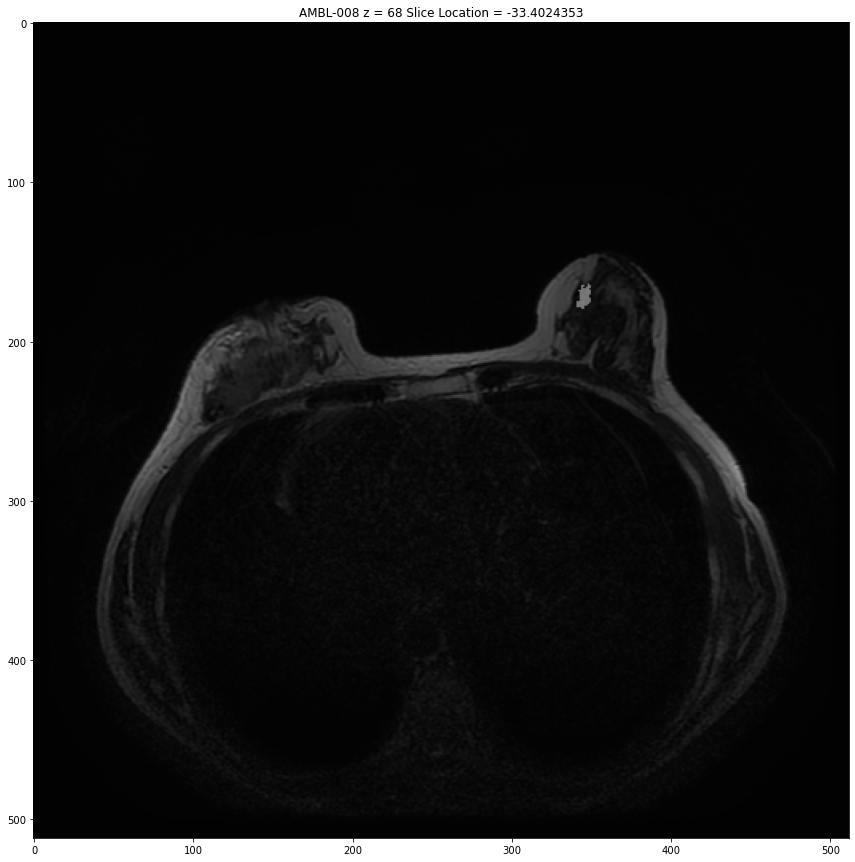

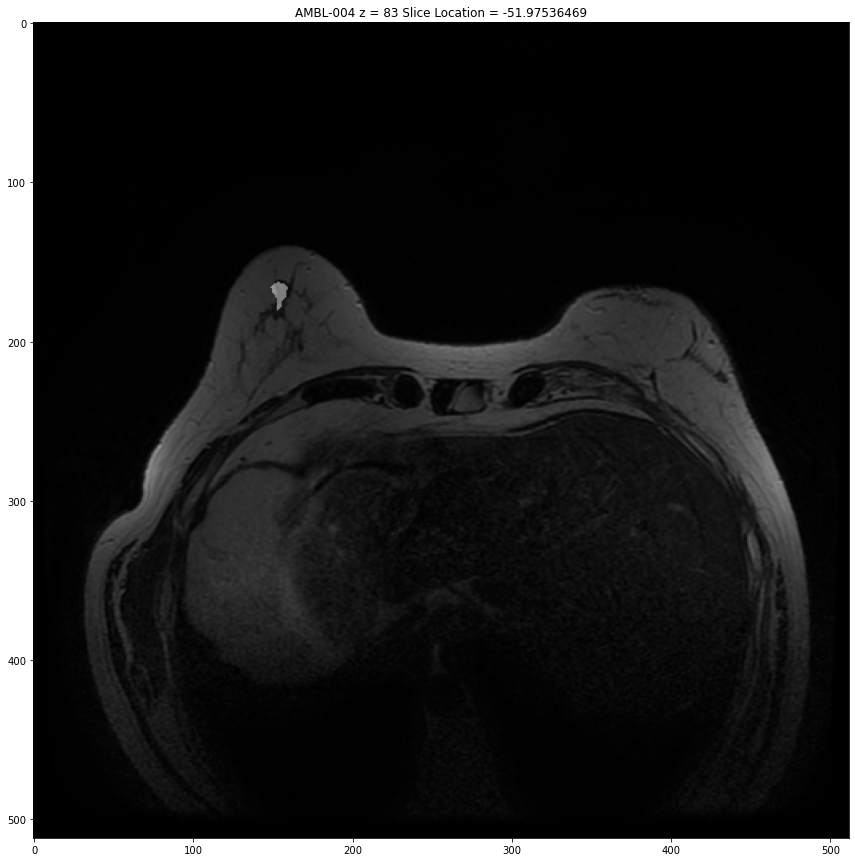

In [85]:
for _, row in top3_z_benign_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    z = int(np.median(row["z_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[z, :, :], cmap=plt.cm.gray)
    plt.imshow(roi[z,:,:], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} z = {z} Slice Location = {slices[z].SliceLocation}')

## y axis

### tumor

In [86]:
top3_y_tumor_df = lesions_df[lesions_df["tumor/benign"] == 1].sort_values(by="y_offset", ascending=False)[:3]
top3_y_tumor_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "y_offset", "y_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
36   AMBL-007  /media/bendico765/Crucial X9/MRI Lesions/manif...   
42   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   
24   AMBL-005  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  y_offset  \
36            7.78      L        92   
42          -17.40      L        83   
24          -28.46      R        55   

                                            y_indexes  
36  [182, 183, 184, 185, 186, 187, 188, 189, 190, ...  
42  [177, 178, 179, 180, 181, 182, 183, 184, 185, ...  
24  [194, 195, 196, 197, 198, 199, 200, 201, 202, ...

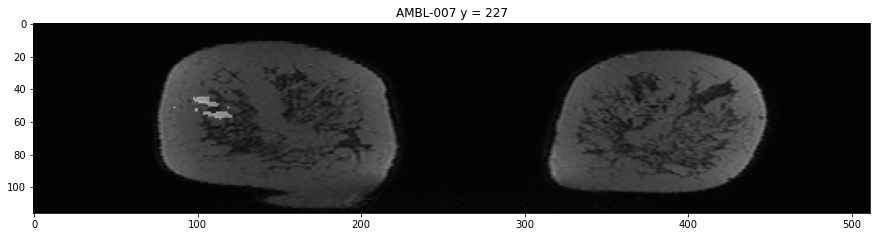

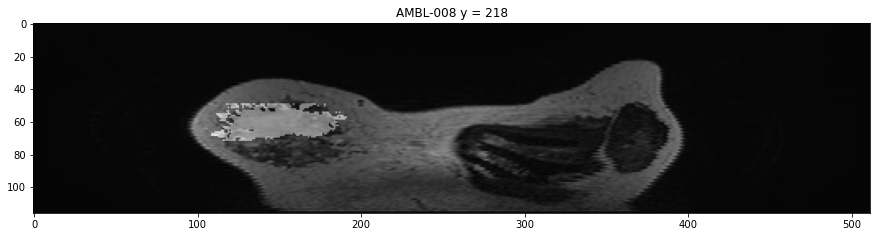

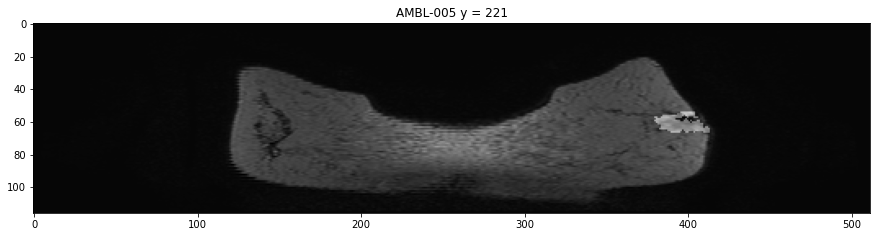

In [88]:
for _, row in top3_y_tumor_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    y = int(np.median(row["y_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[:, y, :], cmap=plt.cm.gray)
    plt.imshow(roi[:,y,:], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} y = {y}')

### benign

In [89]:
top3_y_benign_df = lesions_df[lesions_df["tumor/benign"] == 0].sort_values(by="y_offset", ascending=False)[:3]
top3_y_benign_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "y_offset", "y_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
54   AMBL-010  /media/bendico765/Crucial X9/MRI Lesions/manif...   
43   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   
48   AMBL-009  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  y_offset  \
54            8.71      R        95   
43          -33.40      R        24   
48          -22.90      R        23   

                                            y_indexes  
54  [159, 160, 161, 162, 163, 164, 165, 166, 167, ...  
43  [159, 160, 161, 162, 163, 164, 165, 166, 167, ...  
48  [103, 104, 105, 106, 107, 108, 109, 110, 111, ...

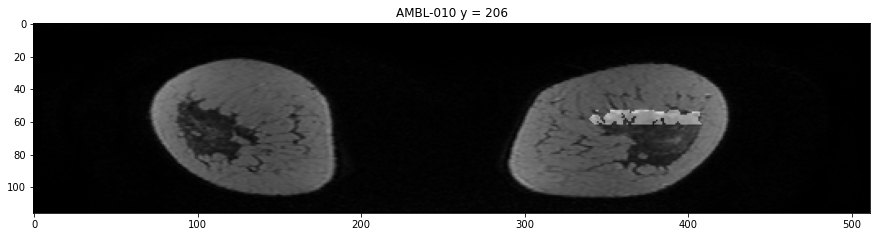

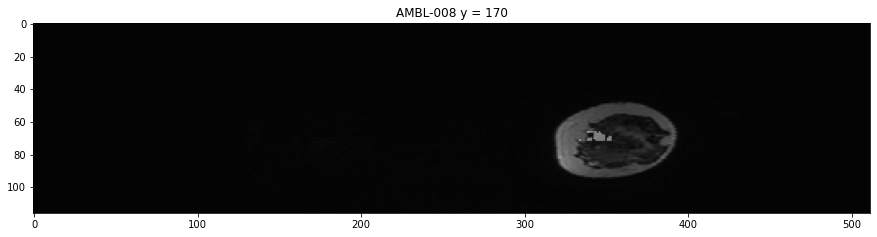

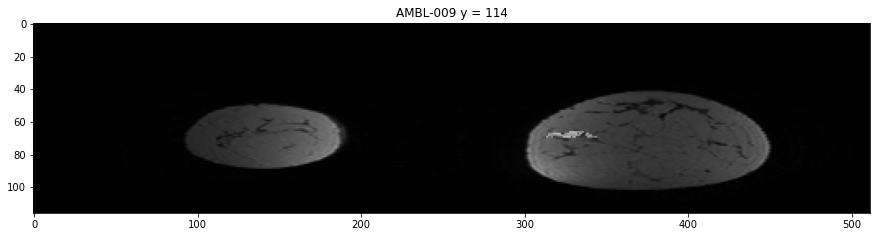

In [90]:
for _, row in top3_y_benign_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    y = int(np.median(row["y_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[:, y, :], cmap=plt.cm.gray)
    plt.imshow(roi[:,y,:], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} y = {y}')

## x axis

### tumor

In [91]:
top3_x_tumor_df = lesions_df[lesions_df["tumor/benign"] == 1].sort_values(by="x_offset", ascending=False)[:3]
top3_x_tumor_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "x_offset", "x_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
42   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   
36   AMBL-007  /media/bendico765/Crucial X9/MRI Lesions/manif...   
24   AMBL-005  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  x_offset  \
42          -17.40      L        97   
36            7.78      L        50   
24          -28.46      R        47   

                                            x_indexes  
42  [98, 99, 100, 101, 102, 103, 104, 105, 106, 10...  
36  [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...  
24  [379, 380, 381, 382, 383, 384, 385, 386, 387, ...

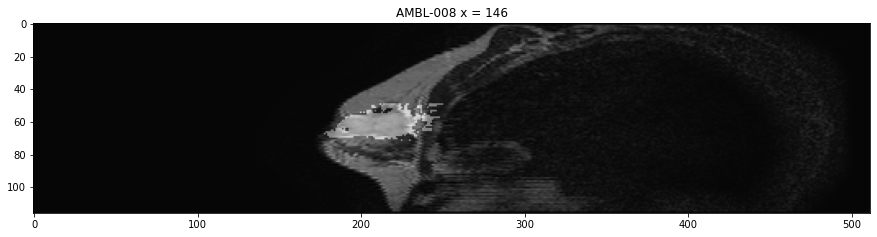

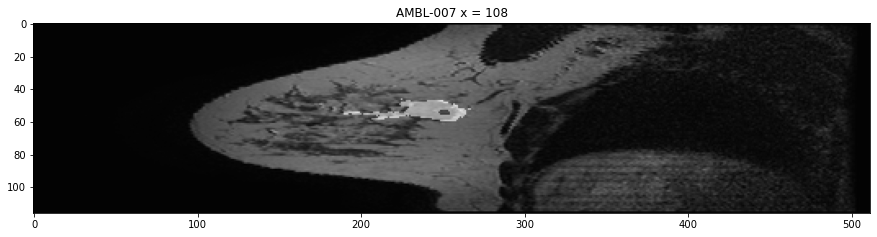

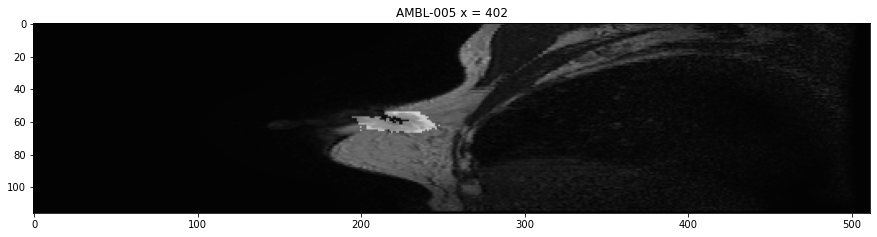

In [92]:
for _, row in top3_x_tumor_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    x = int(np.median(row["x_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[:, :, x], cmap=plt.cm.gray)
    plt.imshow(roi[:,:,x], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} x = {x}')

### benign

In [93]:
top3_x_benign_df = lesions_df[lesions_df["tumor/benign"] == 0].sort_values(by="x_offset", ascending=False)[:3]
top3_x_benign_df[["Patient ID", "Registered Ax T2 FSE path", "Slice Location", "Breast", "x_offset", "x_indexes"]]

Patient ID                          Registered Ax T2 FSE path  \
54   AMBL-010  /media/bendico765/Crucial X9/MRI Lesions/manif...   
48   AMBL-009  /media/bendico765/Crucial X9/MRI Lesions/manif...   
43   AMBL-008  /media/bendico765/Crucial X9/MRI Lesions/manif...   

    Slice Location Breast  x_offset  \
54            8.71      R        76   
48          -22.90      R        35   
43          -33.40      R        23   

                                            x_indexes  
54  [336, 337, 338, 339, 340, 341, 342, 343, 344, ...  
48  [310, 311, 312, 313, 314, 315, 316, 317, 318, ...  
43  [334, 336, 337, 338, 339, 340, 341, 342, 343, ...

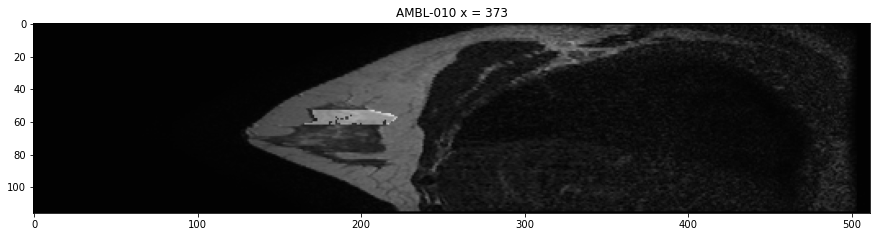

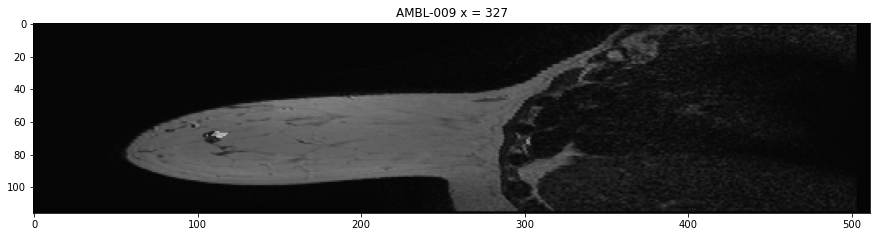

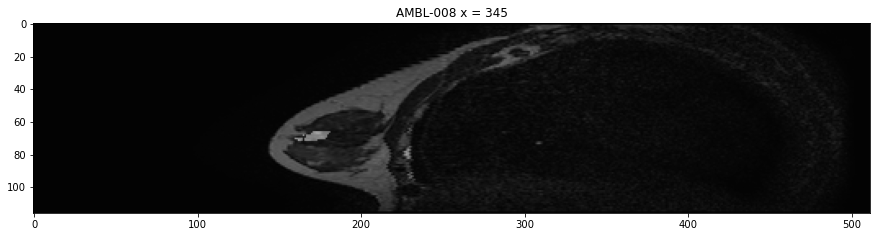

In [94]:
for _, row in top3_x_benign_df.iterrows():
    slices = read_dicomdir(row["Registered Ax T2 FSE path"])
    model_3d = get_3d_shape(slices)
    
    roi = row["Pixel array"]
    x = int(np.median(row["x_indexes"]))
    plt.figure(figsize = (15,15))
    plt.imshow(model_3d[:, :, x], cmap=plt.cm.gray)
    plt.imshow(roi[:,:,x], cmap=plt.cm.gray, alpha=0.4)
    plt.title(f'{row["Patient ID"]} x = {x}')